In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyse et correction du dataset

### Lecture des fichiers

In [287]:
dataX = pd.read_csv('X.csv', delimiter=',')
dataX.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


In [288]:
dfX = dataX.copy()

In [289]:
dataY = pd.read_csv('Y.csv', delimiter=',')
dataY.head()

,Unnamed: 0,Identifiant,target
0,0,18702,0
1,1,3877,1
2,2,4942,0
3,3,13428,0
4,4,17137,0


In [290]:
dfY = dataY.copy()

#### Dimension du dataset

In [291]:
dfX.shape

(10229, 26)

In [292]:
dfY.shape

(10229, 3)

### Types et valeurs manquantes par variable

In [293]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10229 non-null  int64  
 1   Identifiant  10229 non-null  int64  
 2   ft_2_categ   10229 non-null  int64  
 3   EXPO         10229 non-null  object 
 4   ft_4_categ   10229 non-null  int64  
 5   ft_5_categ   10229 non-null  object 
 6   ft_6_categ   10229 non-null  object 
 7   ft_7_categ   10229 non-null  object 
 8   ft_8_categ   10229 non-null  object 
 9   ft_9_categ   10229 non-null  object 
 10  ft_10_categ  10229 non-null  object 
 11  ft_11_categ  10229 non-null  object 
 12  ft_12_categ  10229 non-null  object 
 13  ft_13_categ  10229 non-null  object 
 14  ft_14_categ  10229 non-null  object 
 15  ft_15_categ  10229 non-null  object 
 16  ft_16_categ  10229 non-null  object 
 17  ft_17_categ  10229 non-null  object 
 18  ft_18_categ  10229 non-null  object 
 19  ft_1

In [294]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   10229 non-null  int64
 1   Identifiant  10229 non-null  int64
 2   target       10229 non-null  int64
dtypes: int64(3)
memory usage: 239.9 KB


In [295]:
dfX.isnull().sum()

Unnamed: 0        0
Identifiant       0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
dtype: int64

In [296]:
dfY.isnull().sum()

Unnamed: 0     0
Identifiant    0
target         0
dtype: int64

Observations : 
- La colonne Unnamed n'est pas utile car elle recence le numéro de ligne de la ligne dans le fichier csv.
- Dans certaines colonnes des lignes sont vides (superficief, ft_22_categ, Insee) mais aucune colonne entièrement vide.
- Les colonnes nommées ft_XX_categ sont anonymisées il faudra donc faire des biais statistiques, sauf ft_2_categ qu'il faudra renommer.
- Nous avons remarqués que la colonne identifiant permet de faire un lien entre les 2 fichiers. Nous décidons donc de faire ce lien dans le fichier CSV de manière à ne traiter qu'un seul dataset.
- La plupart des types des différentes colonnes semblent cohérentes par rapport à leurs descriptions sauf : 
        - Identifiant qui est en int64 qu'il faut passer en object car ce n'est pas une variable quantitative
        - ft_4_categ qui semblent être un booléen à la place d'un int64
        - ft_22_categ qui semblent représenter une année qui est en float64, que l'on va passer en int64, mais elle contient des valeurs 'NaN' qu'il faut dans un premier temps passer en null, et on prend seulement les valeurs au dessus de l'année '1900' pour avoir un échantillon plus significatif
        - ft_23_categ qui est un object, qu'il faut passer en float64, elle contient très peux de données de valeur "V" qui correspondent à environ 1% du dataset que l'on va passer en null
        - ft_24_categ qui est en object qu'il faut passer en int64, remplacer les valeurs "." par null, et passer à null les lignes avec les valeurs >= 10 qui représentent moins d'1% du dataset
- Aucune ligne est entièrement nulle.


### Identification et suppression des colonnes "Unnamed"


In [297]:
dfX.drop(dfX.columns[0], axis=1, inplace=True)

In [298]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  int64  
 2   EXPO         10229 non-null  object 
 3   ft_4_categ   10229 non-null  int64  
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  int64  
 19  supe

In [299]:
dfY.drop(dfY.columns[0], axis=1, inplace=True)

In [300]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Identifiant  10229 non-null  int64
 1   target       10229 non-null  int64
dtypes: int64(2)
memory usage: 160.0 KB


### Identification et renommage de la colonne "ft_2_categ" en "annee_sinistre"

In [301]:
dfX.rename(columns={'ft_2_categ': 'annee_sinistre'}, inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Identifiant     10229 non-null  int64  
 1   annee_sinistre  10229 non-null  int64  
 2   EXPO            10229 non-null  object 
 3   ft_4_categ      10229 non-null  int64  
 4   ft_5_categ      10229 non-null  object 
 5   ft_6_categ      10229 non-null  object 
 6   ft_7_categ      10229 non-null  object 
 7   ft_8_categ      10229 non-null  object 
 8   ft_9_categ      10229 non-null  object 
 9   ft_10_categ     10229 non-null  object 
 10  ft_11_categ     10229 non-null  object 
 11  ft_12_categ     10229 non-null  object 
 12  ft_13_categ     10229 non-null  object 
 13  ft_14_categ     10229 non-null  object 
 14  ft_15_categ     10229 non-null  object 
 15  ft_16_categ     10229 non-null  object 
 16  ft_17_categ     10229 non-null  object 
 17  ft_18_categ     10229 non-null 

### Identification et merge des deux dataset

In [302]:
dfZ = pd.merge(dfX, dfY, on='Identifiant')

In [303]:
dfZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Identifiant     10229 non-null  int64  
 1   annee_sinistre  10229 non-null  int64  
 2   EXPO            10229 non-null  object 
 3   ft_4_categ      10229 non-null  int64  
 4   ft_5_categ      10229 non-null  object 
 5   ft_6_categ      10229 non-null  object 
 6   ft_7_categ      10229 non-null  object 
 7   ft_8_categ      10229 non-null  object 
 8   ft_9_categ      10229 non-null  object 
 9   ft_10_categ     10229 non-null  object 
 10  ft_11_categ     10229 non-null  object 
 11  ft_12_categ     10229 non-null  object 
 12  ft_13_categ     10229 non-null  object 
 13  ft_14_categ     10229 non-null  object 
 14  ft_15_categ     10229 non-null  object 
 15  ft_16_categ     10229 non-null  object 
 16  ft_17_categ     10229 non-null  object 
 17  ft_18_categ     10229 non-null 

### Changement de type pour les variables Identifiant, ft_4_categ et ft_22_categ

In [304]:
dfZ['Identifiant'] = dfZ['Identifiant'].astype(int).astype(object)
dfZ['Identifiant'].head()

0    18702
1     3877
2     4942
3    13428
4    17137
Name: Identifiant, dtype: object

In [305]:
dfZ['ft_4_categ'] = dfZ['ft_4_categ'].astype(bool)
dfZ['ft_4_categ'].head()

0    False
1    False
2     True
3    False
4    False
Name: ft_4_categ, dtype: bool

In [306]:
dfZ['ft_22_categ'].fillna(0, inplace=True)
dfZ['ft_22_categ'] = dfZ['ft_22_categ'].astype(int)
dfZ['ft_22_categ'] = dfZ['ft_22_categ'].loc[dfZ['ft_22_categ'] >= 1900]
dfZ['ft_22_categ'].head()

0    2012.0
1    1980.0
2       NaN
3       NaN
4    1972.0
Name: ft_22_categ, dtype: float64

### Remplacer les valeurs "." par null, passer à null les valeurs ">=10", changement de types pour la variable ft_24_categ

In [307]:
# Supprime les espaces blancs avant et après les valeurs puis remplace '.' par NaN
dfZ['ft_24_categ'] = dfZ['ft_24_categ'].str.strip().replace(to_replace='.', value=np.nan)
dfZ['ft_24_categ'] = dfZ['ft_24_categ'].str.strip().replace(to_replace='>=10', value=np.nan)
dfZ['ft_24_categ'].head()

0      2
1    NaN
2    NaN
3    NaN
4      4
Name: ft_24_categ, dtype: object

In [308]:
dfZ['ft_24_categ'] = dfZ['ft_24_categ'].fillna(0)
dfZ['ft_24_categ'] = dfZ['ft_24_categ'].replace('null', 0)
dfZ['ft_24_categ'].head()

0    2
1    0
2    0
3    0
4    4
Name: ft_24_categ, dtype: object

In [309]:
dfZ['ft_24_categ'] = dfZ['ft_24_categ'].astype(int)
dfZ['ft_24_categ'].head()

0    2
1    0
2    0
3    0
4    4
Name: ft_24_categ, dtype: int64

### Pour ft_23_categ, on remplacer les valeurs 'V' par null, et on passe le type object en type float64

In [310]:
# Supprime les espaces blancs avant et après les valeurs puis remplace '.' par NaN
dfZ['ft_23_categ'] = dfZ['ft_23_categ'].str.strip().replace(to_replace='V', value=np.nan)
dfZ['ft_23_categ'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ft_23_categ, dtype: object

In [311]:
#dfZ['ft_23_categ'] = dfZ['ft_23_categ'].fillna(0)
#dfZ['ft_23_categ'] = dfZ['ft_23_categ'].replace('null', 0)
dfZ['ft_23_categ'] = pd.to_numeric(dfZ['ft_23_categ'], errors='coerce')
dfZ['ft_23_categ'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ft_23_categ, dtype: float64

### Distribution variable cible

In [312]:
dfZ['target'].value_counts()

target
0    7907
1    2322
Name: count, dtype: int64

Observations : La classe n'est pas équilibré, on remarque qu'il y à beaucoup plus de valeurs 0, qui signifie qu'il y a beaucoup plus de bâtiment qui n'ont pas eu de sinistre

### Analyse univarié variable quanti

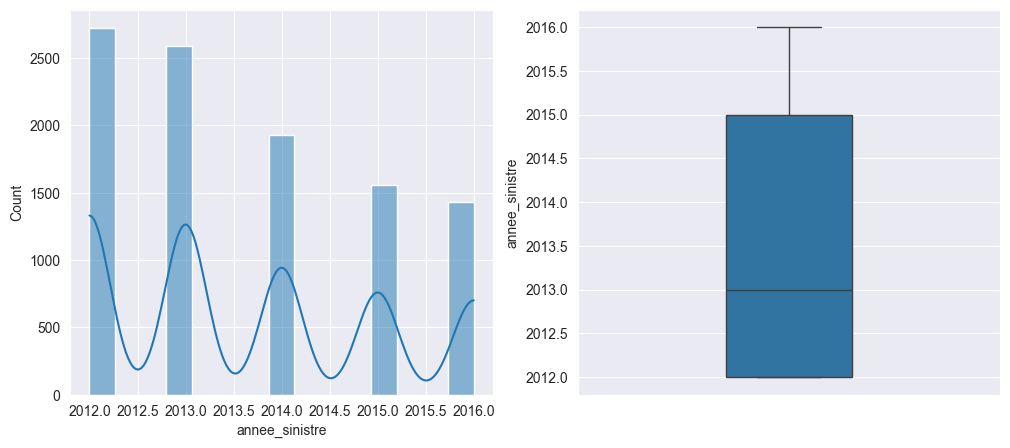

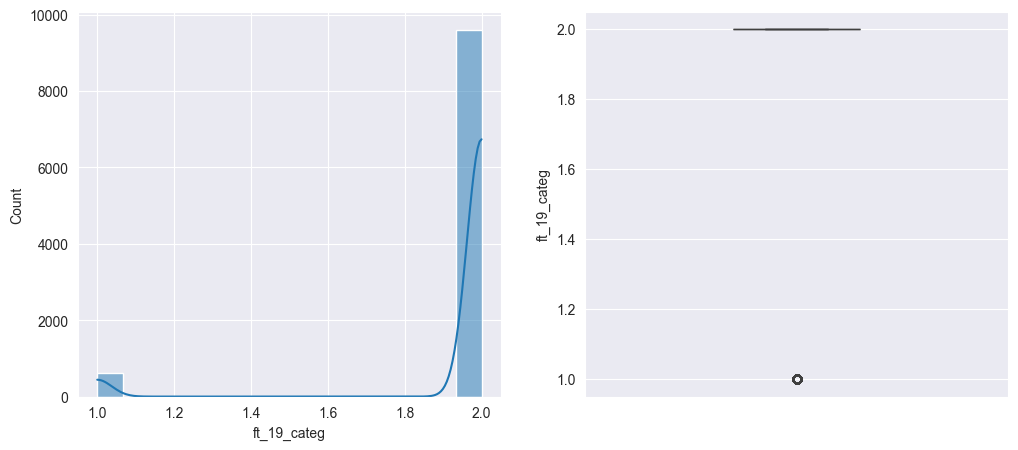

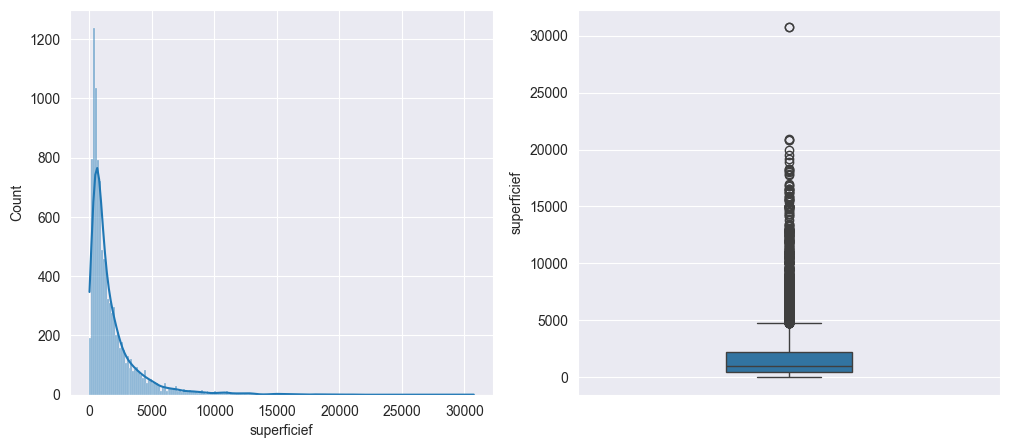

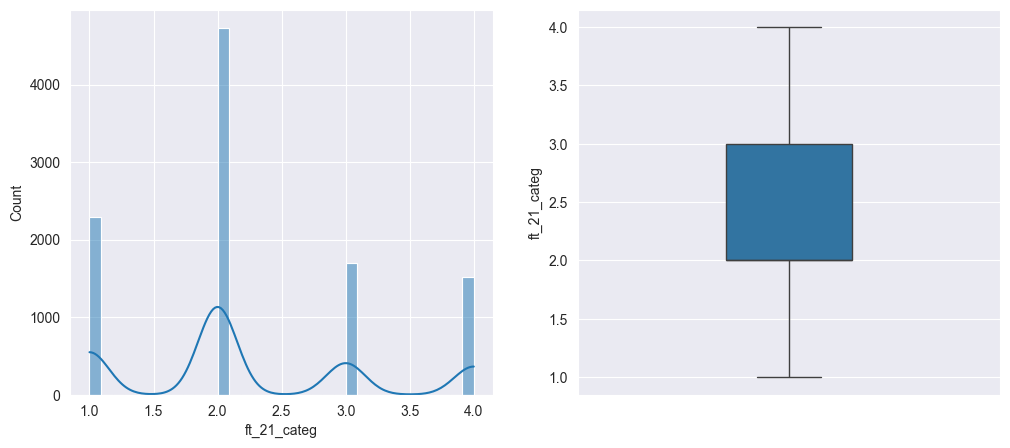

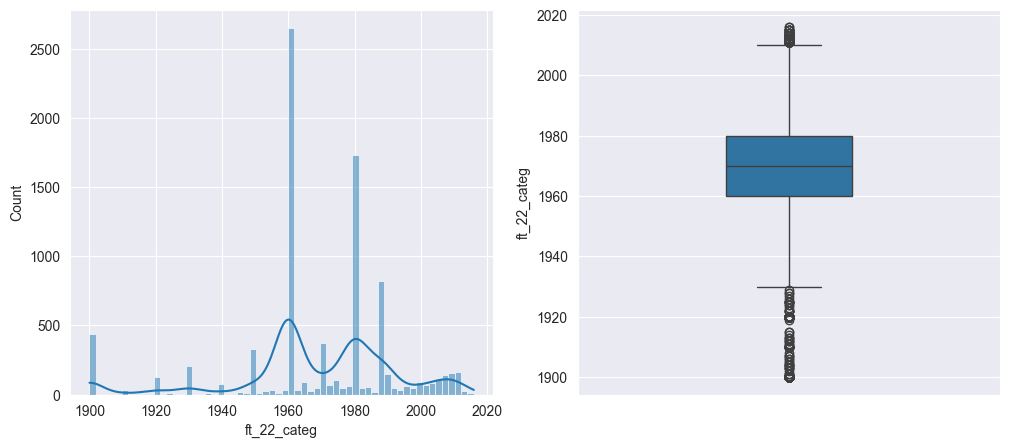

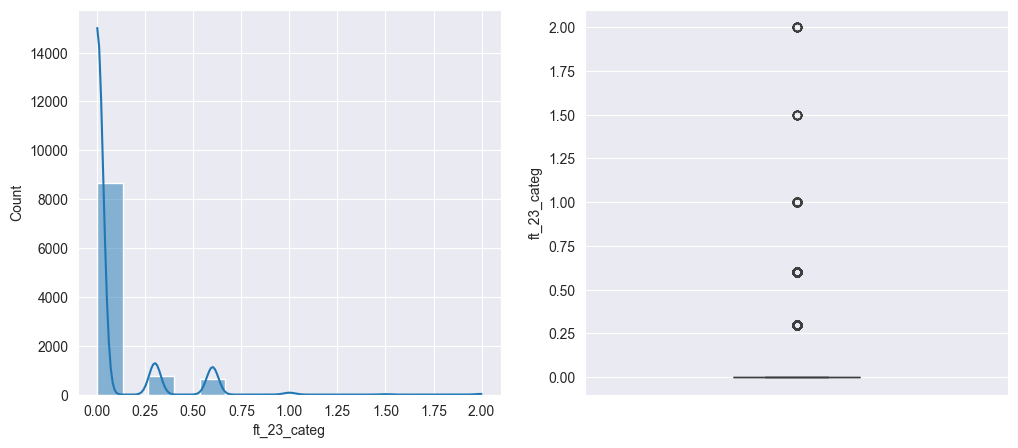

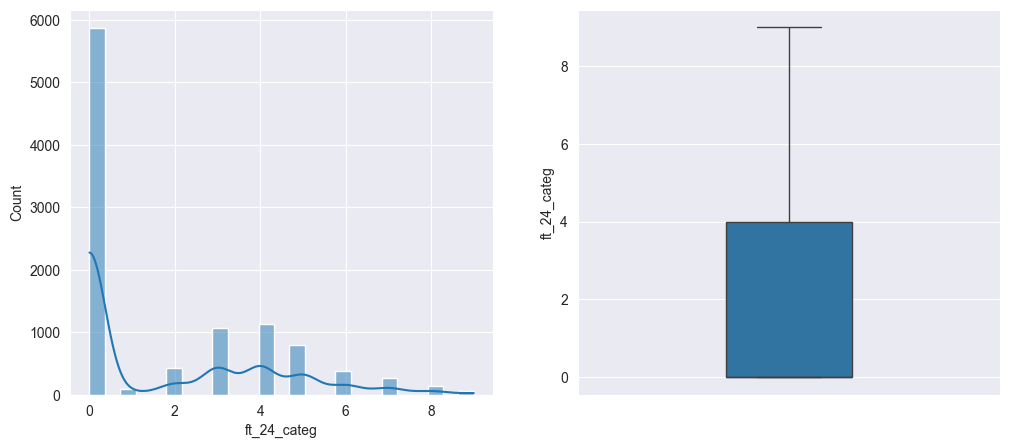

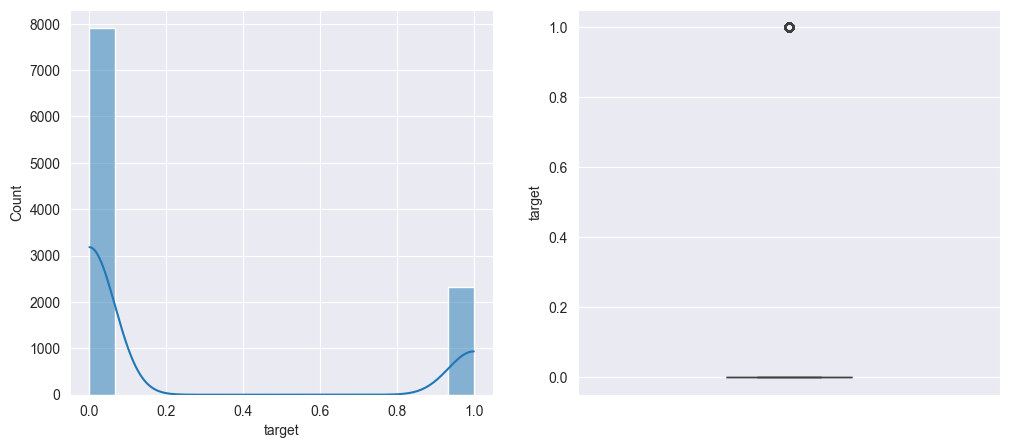

In [313]:
import seaborn as sns

for col in dfZ.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(dfZ[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(dfZ[col], width= 0.3)

Observations : 
- Pour la variable ft_22_categ, on peut voir pleins de 0, il faut les passer en null
- Pour la variable ft_23_categ, on voit très peu de données pour les valeurs 1, 1.5 et 2 qu'on peut donc remplacer par null
- Pour la variable ft_24_categ, on peut voir pleins de 0, il faut les passer en null

### Remplacer les 0 par des valeurs nulles pour les variables ft_22_categ et ft_23_categ

In [314]:
dfZ['ft_22_categ'].loc[dfZ['ft_22_categ'] == 0] = None

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_23327/198378254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfZ['ft_22_categ'].loc[dfZ['ft_22_categ'] == 0] = None


In [315]:
dfZ.isnull().sum()

Identifiant          0
annee_sinistre       0
EXPO                 0
ft_4_categ           0
ft_5_categ           0
ft_6_categ           0
ft_7_categ           0
ft_8_categ           0
ft_9_categ           0
ft_10_categ          0
ft_11_categ          0
ft_12_categ          0
ft_13_categ          0
ft_14_categ          0
ft_15_categ          0
ft_16_categ          0
ft_17_categ          0
ft_18_categ          0
ft_19_categ          0
superficief        119
ft_21_categ          0
ft_22_categ       1448
ft_23_categ        115
ft_24_categ          0
Insee              115
target               0
dtype: int64

In [316]:
dfZ['ft_24_categ'].loc[dfZ['ft_24_categ'] == 0] = None
dfZ.isnull().sum()

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_23327/51341690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfZ['ft_24_categ'].loc[dfZ['ft_24_categ'] == 0] = None


Identifiant          0
annee_sinistre       0
EXPO                 0
ft_4_categ           0
ft_5_categ           0
ft_6_categ           0
ft_7_categ           0
ft_8_categ           0
ft_9_categ           0
ft_10_categ          0
ft_11_categ          0
ft_12_categ          0
ft_13_categ          0
ft_14_categ          0
ft_15_categ          0
ft_16_categ          0
ft_17_categ          0
ft_18_categ          0
ft_19_categ          0
superficief        119
ft_21_categ          0
ft_22_categ       1448
ft_23_categ        115
ft_24_categ       5869
Insee              115
target               0
dtype: int64

### Suppression des valeurs 1, 1.5 et 2 pour ft_23_categ

In [317]:
values_to_replace = {1.0: np.nan, 1.5: np.nan, 2.0: np.nan}
dfZ['ft_23_categ'] = dfZ['ft_23_categ'].replace(values_to_replace)

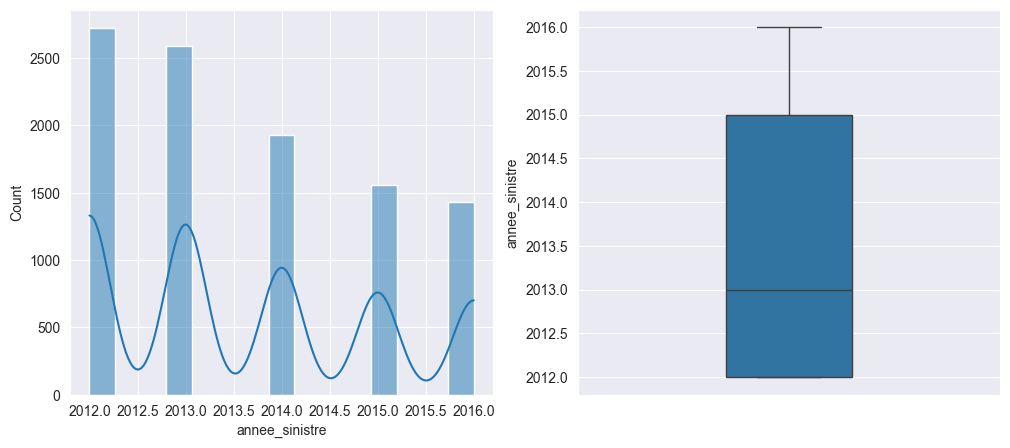

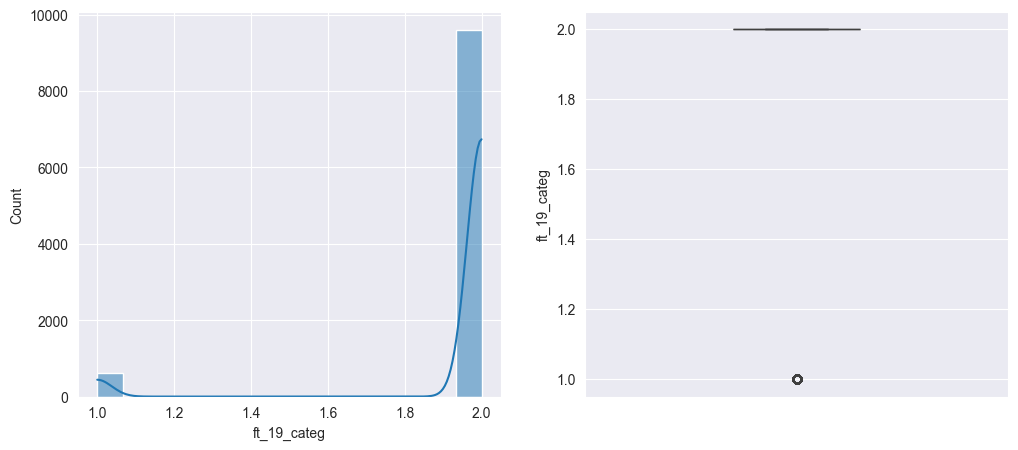

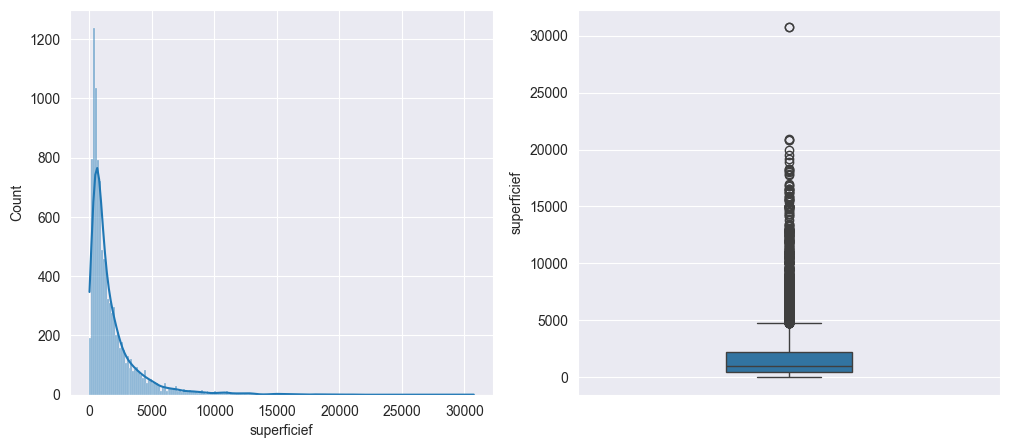

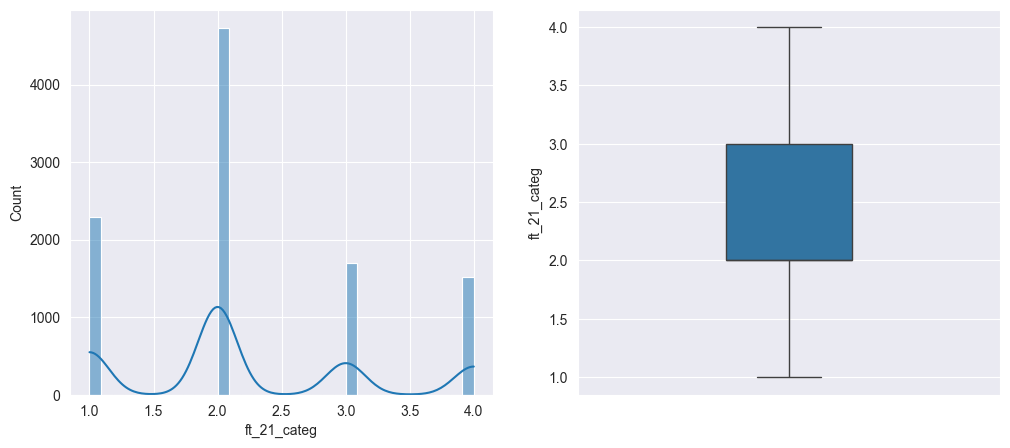

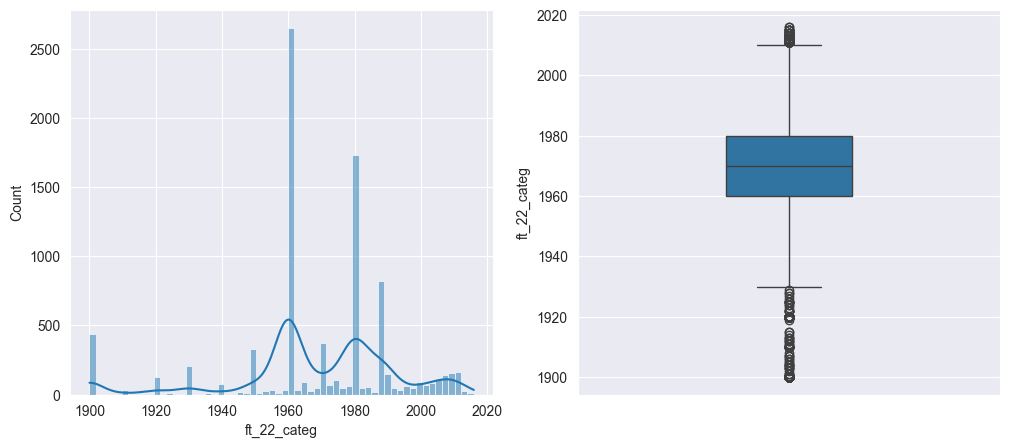

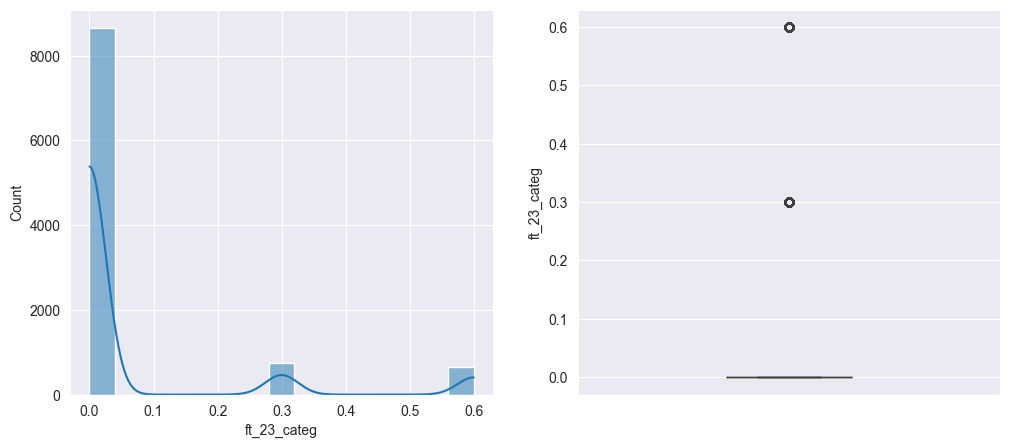

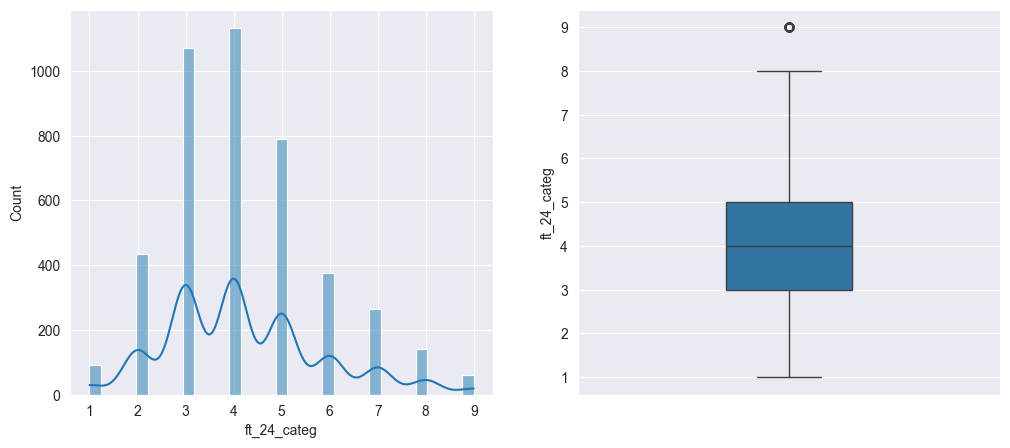

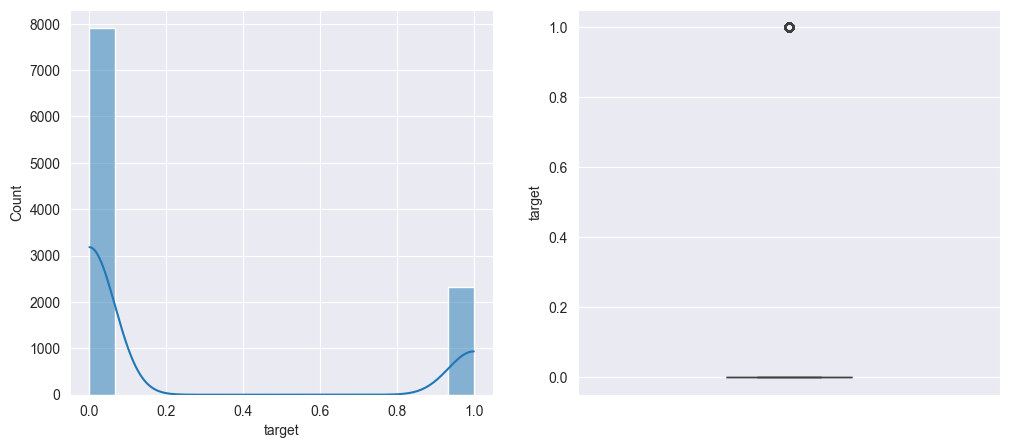

In [318]:
import seaborn as sns

for col in dfZ.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(dfZ[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(dfZ[col], width= 0.3)

### Analyse univarié quali

In [319]:
for col in dfZ.select_dtypes('object'):
    print(f'{col :-<20} {dfZ[col].unique()}')

Identifiant--------- [18702 3877 4942 ... 8499 5319 8817]
EXPO---------------- ['1' '0,246575342' '0,99726776' '0,081967213' '0,580821918' '0,378082192'
 '0,41369863' '0,334246575' '0,161643836' '0,665753425' '0' '0,579234973'
 '0,163934426' '0,581967213' '0,832876712' '0,915068493' '0,24863388'
 '0,836065574' '0,452054795' '0,983561644' '0,271232877' '0,997260274'
 '0,545205479' '0,74863388' '0,330601093' '0,493150685' '0,75136612'
 '0,803278689' '0,912568306' '0,747945205' '0,164383562' '0,950684932'
 '0,964480874' '0,471232877' '0,284931507' '0,457534247' '0,846575342'
 '0,482191781' '0,375342466' '0,177595628' '0,082191781' '0,843835616'
 '0,43442623' '0,237704918' '0,578082192' '0,084931507' '0,051912568'
 '0,194520548' '0,123287671' '0,794520548' '0,25136612' '0,606557377'
 '0,97260274' '0,235616438' '0,494535519' '0,120547945' '0,584699454'
 '0,682191781' '0,087671233' '0,50273224' '0,909836066' '0,166666667'
 '0,882191781' '0,104109589' '0,504109589' '0,783561644' '0,336986301'

Observations : 
- Nous ne sommes pas en possession des informations nécessaires pour savoir si les données présentent sont conformes et cohérentes car toutes les colonnes ft_XX_categ sont anonymisées


### Affichage graphique variable qualitative


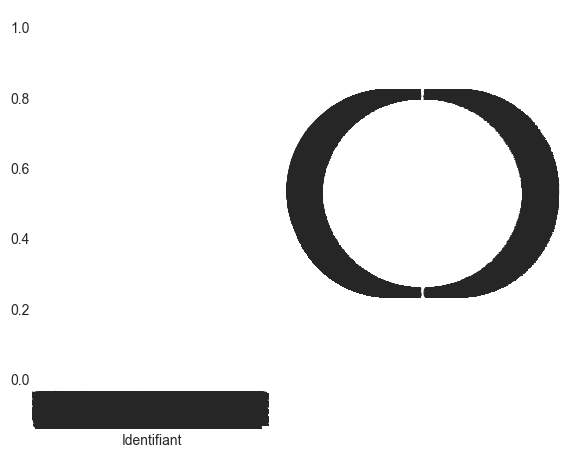

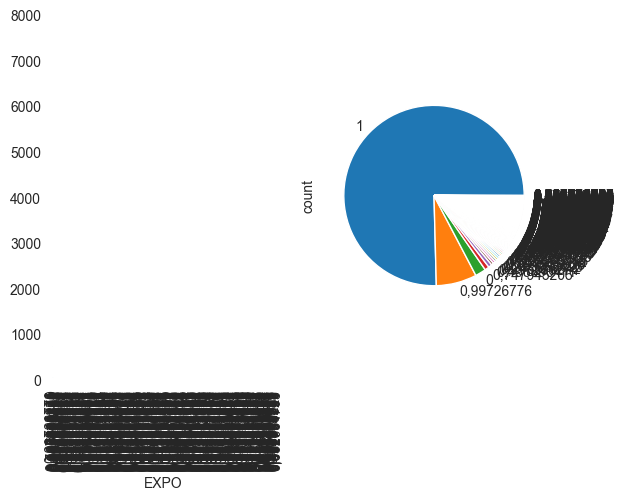

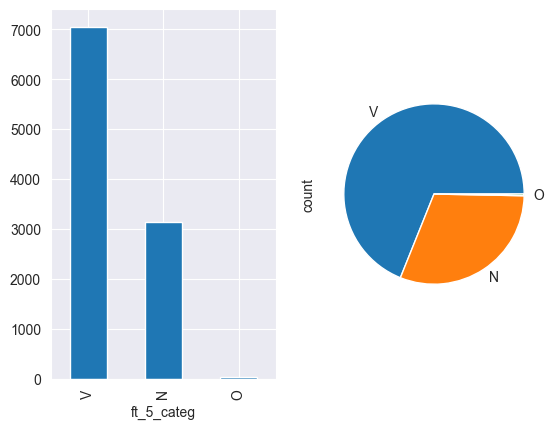

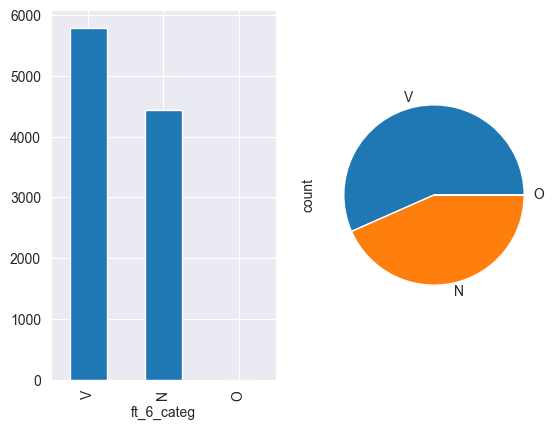

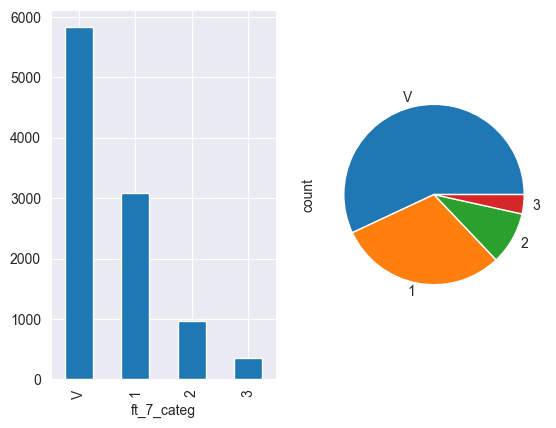

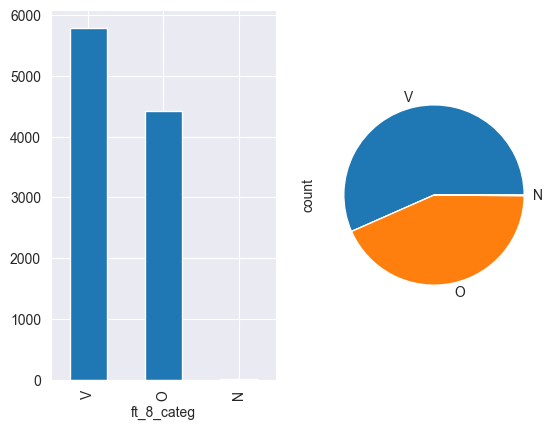

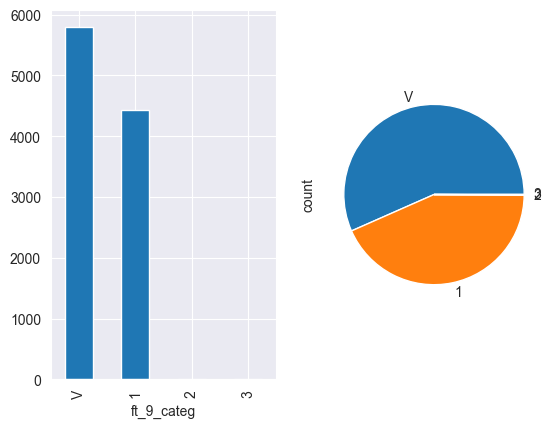

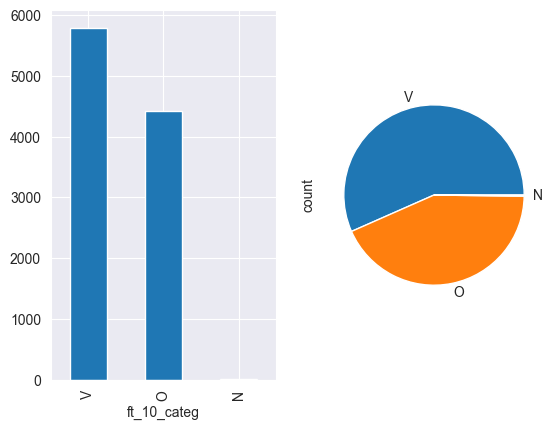

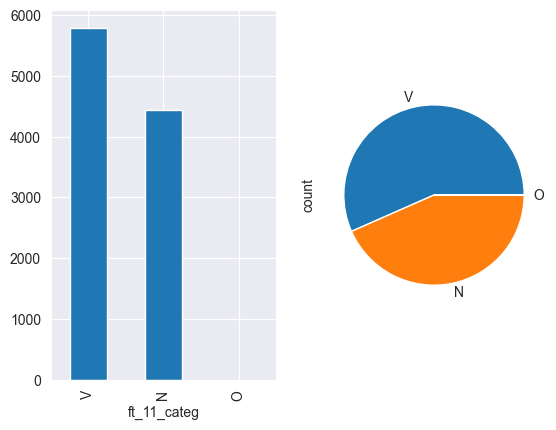

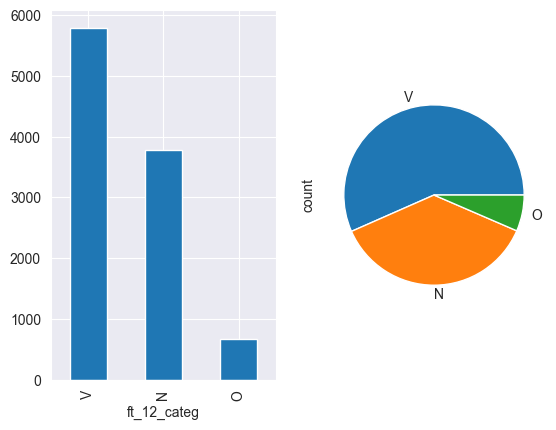

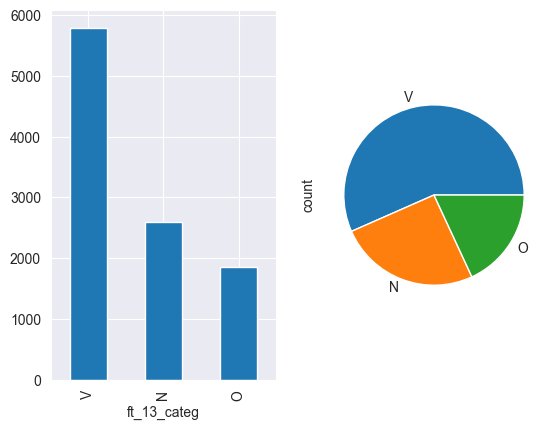

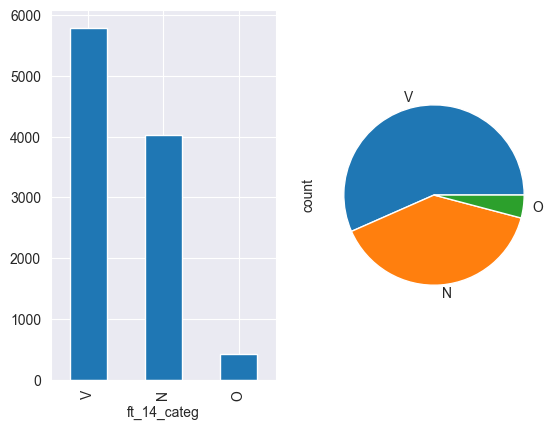

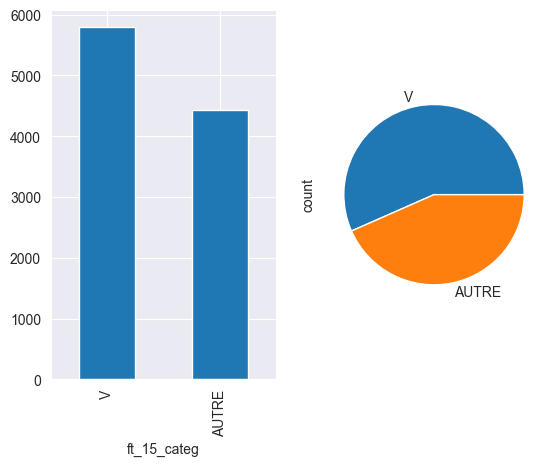

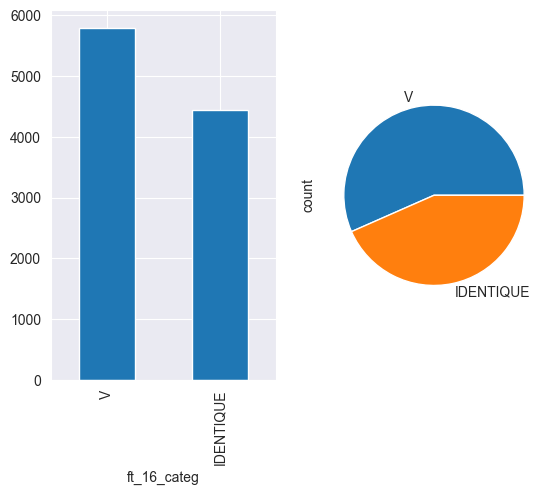

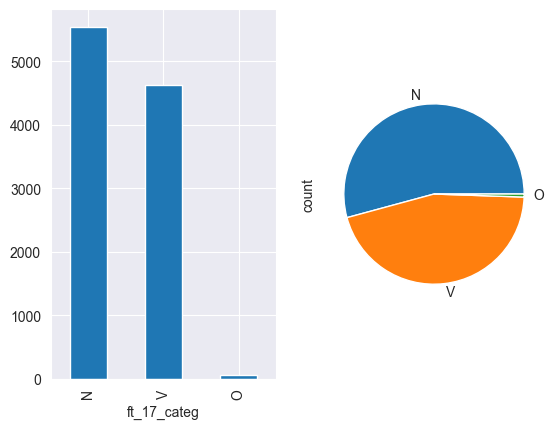

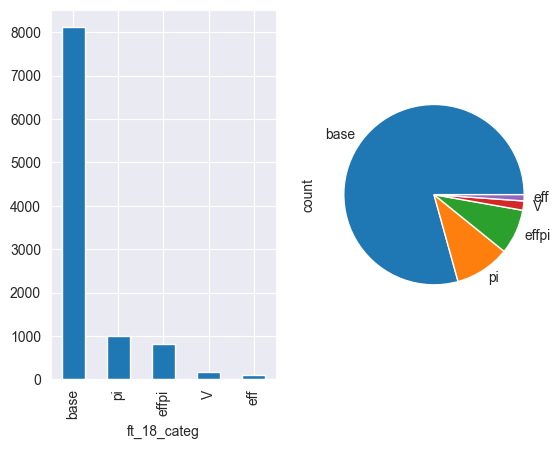

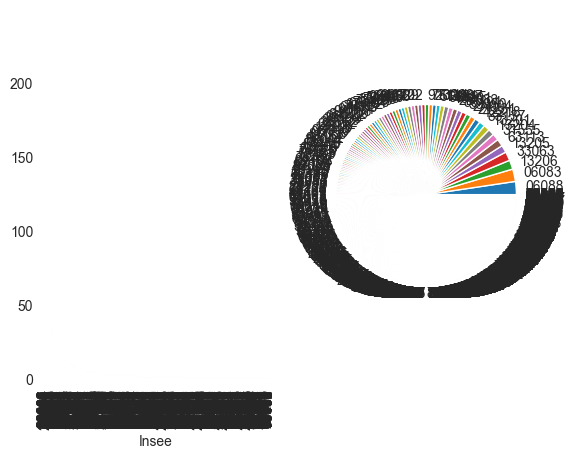

In [320]:
for col in dfZ.select_dtypes('object') :
    plt.figure()
    
    plt.subplot(1,2,1)
    dfZ[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    dfZ[col].value_counts().plot.pie()

Observations : 
- Pour la colonne identifiant, expo, et insee on remarque que les données affichées sont illisbles. Cependant ces données ne sont ni quantitatives, ni qualitatives, elles permettent seulement d'identifier la ligne en question donc on décide de les exclure de notre analyse qualitative

### Supprimer les colonnes Identifiant, Expo et Insee

In [321]:
# Supposons que dfZ est votre DataFrame

# Supprimer les colonnes 'Identifiant', 'EXPO', et 'Insee'
dfZ = dfZ.drop(['Identifiant', 'EXPO', 'Insee'], axis=1)

# Afficher les premières lignes du DataFrame modifié pour vérifier
print(dfZ.head())


   annee_sinistre  ft_4_categ ft_5_categ ft_6_categ ft_7_categ ft_8_categ  \
0            2014       False          V          N          1          O   
1            2014       False          V          V          V          V   
2            2013        True          V          V          V          V   
3            2013       False          N          V          V          V   
4            2015       False          V          N          2          O   

  ft_9_categ ft_10_categ ft_11_categ ft_12_categ  ... ft_16_categ ft_17_categ  \
0          1           O           N           N  ...   IDENTIQUE           V   
1          V           V           V           V  ...           V           N   
2          V           V           V           V  ...           V           N   
3          V           V           V           V  ...           V           N   
4          1           O           N           N  ...   IDENTIQUE           V   

  ft_18_categ ft_19_categ superficief ft_21_categ 

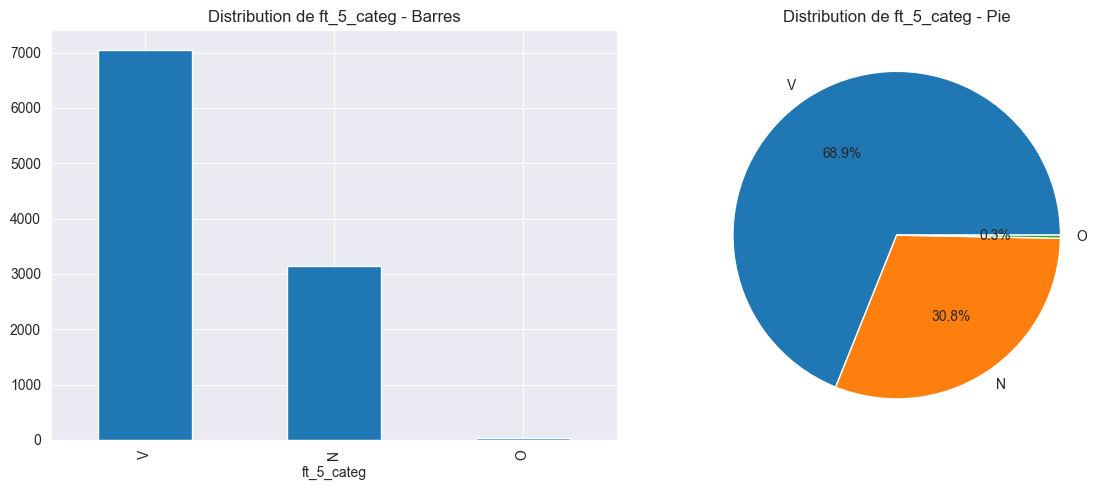

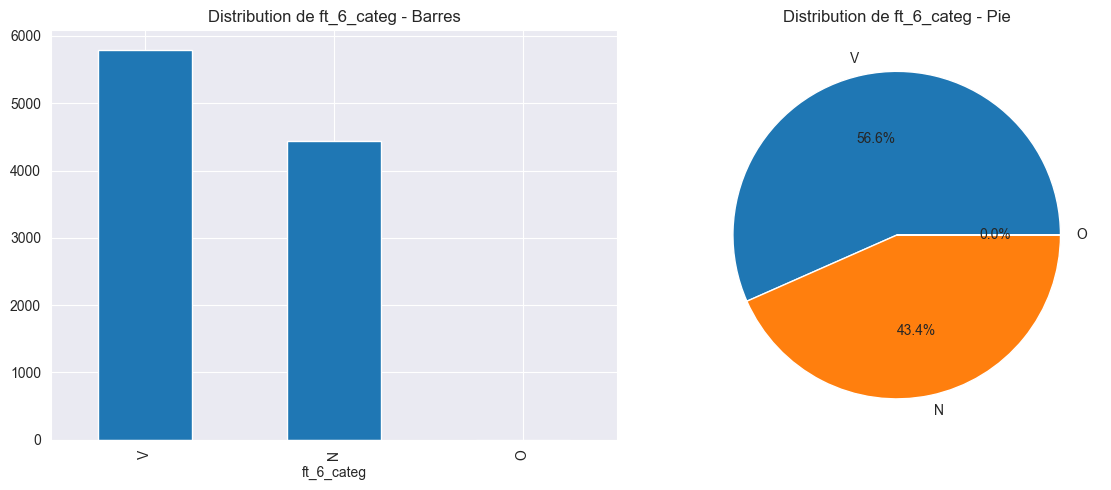

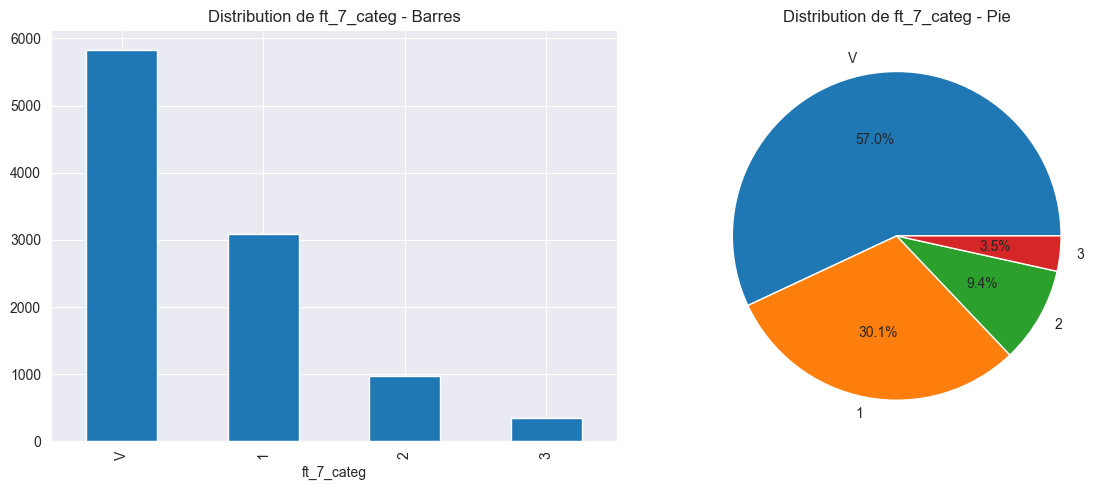

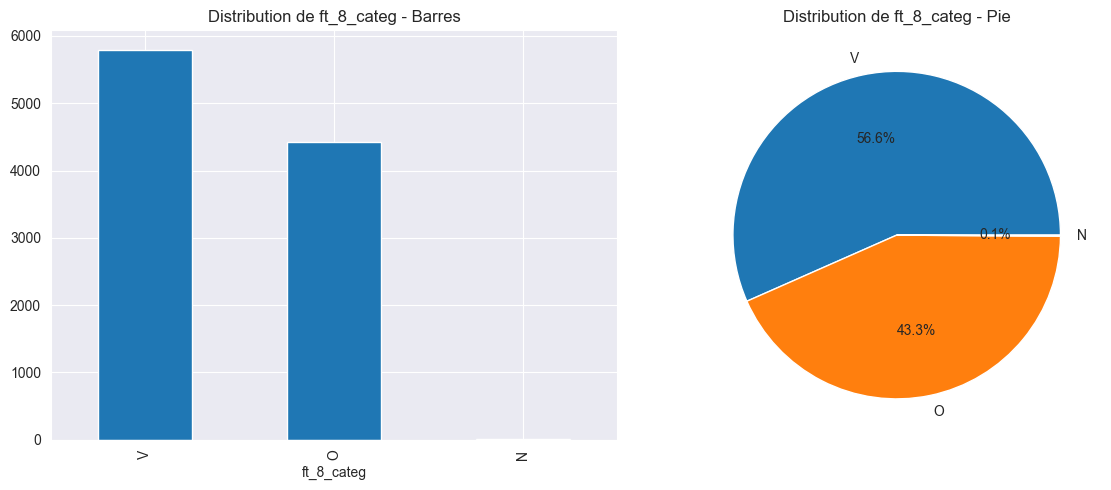

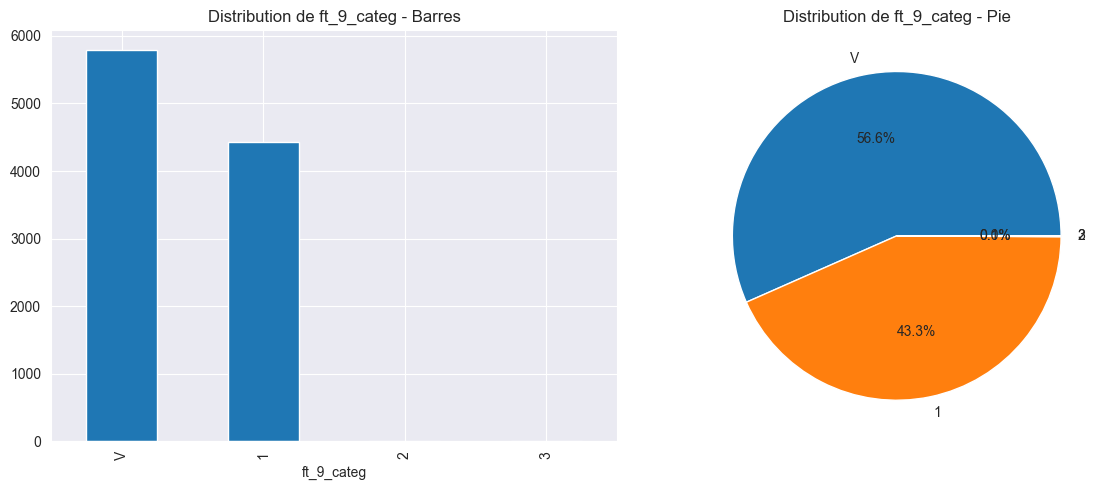

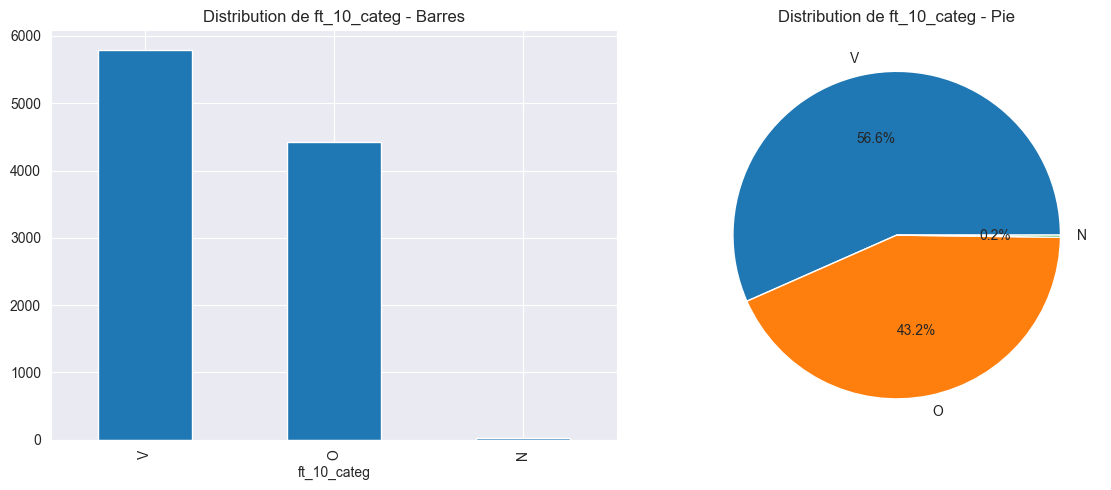

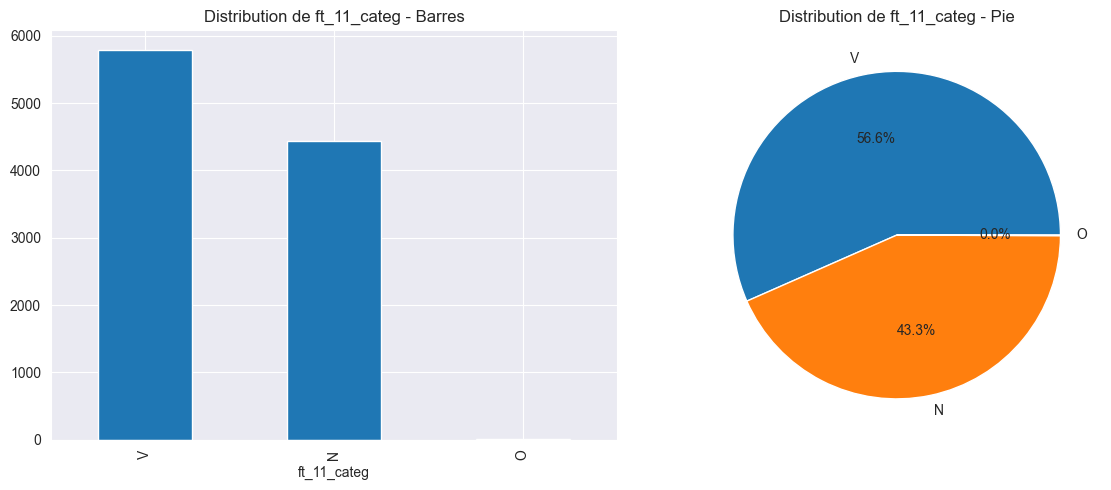

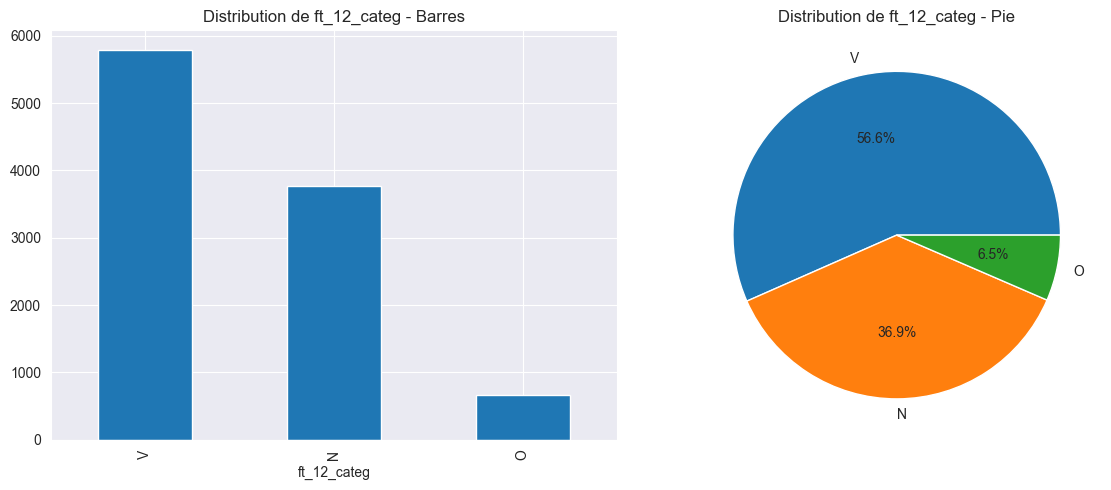

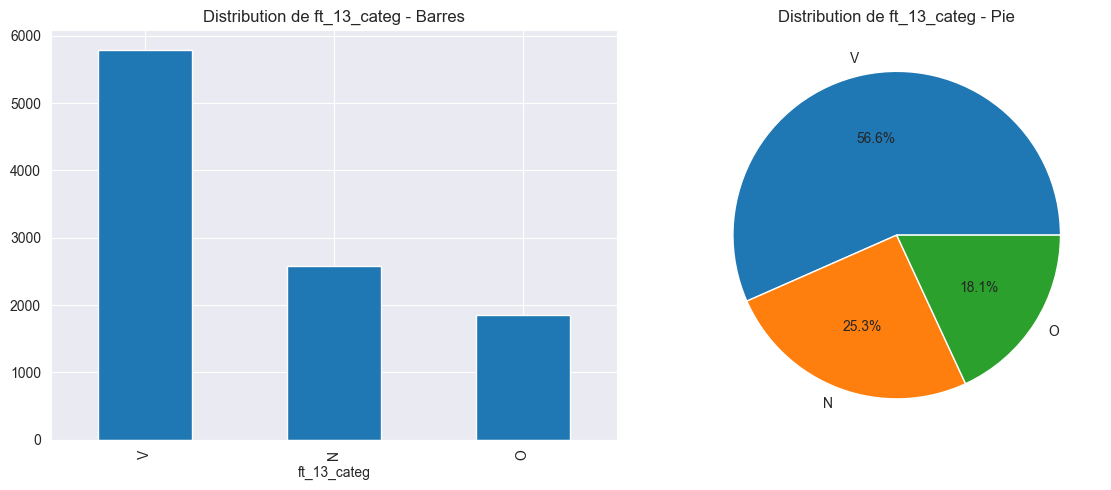

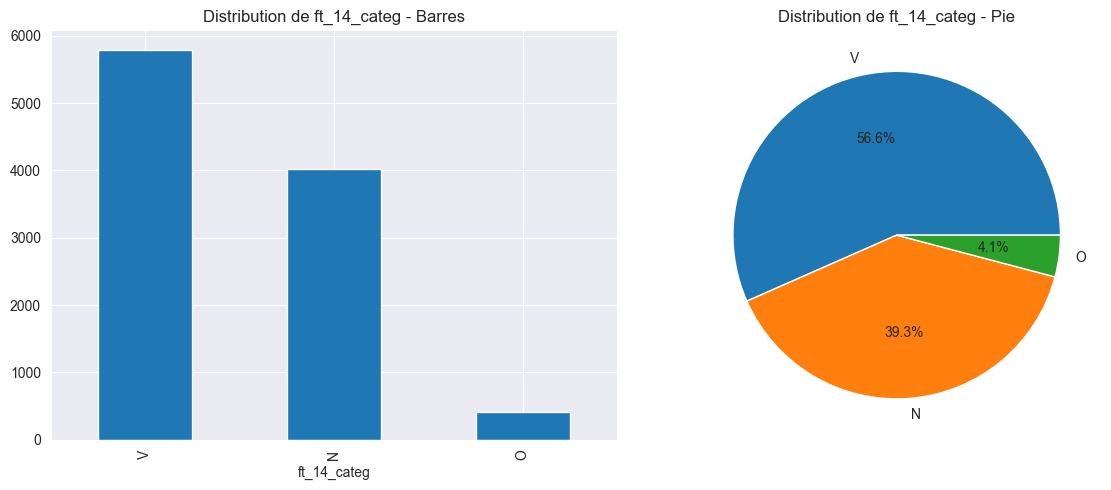

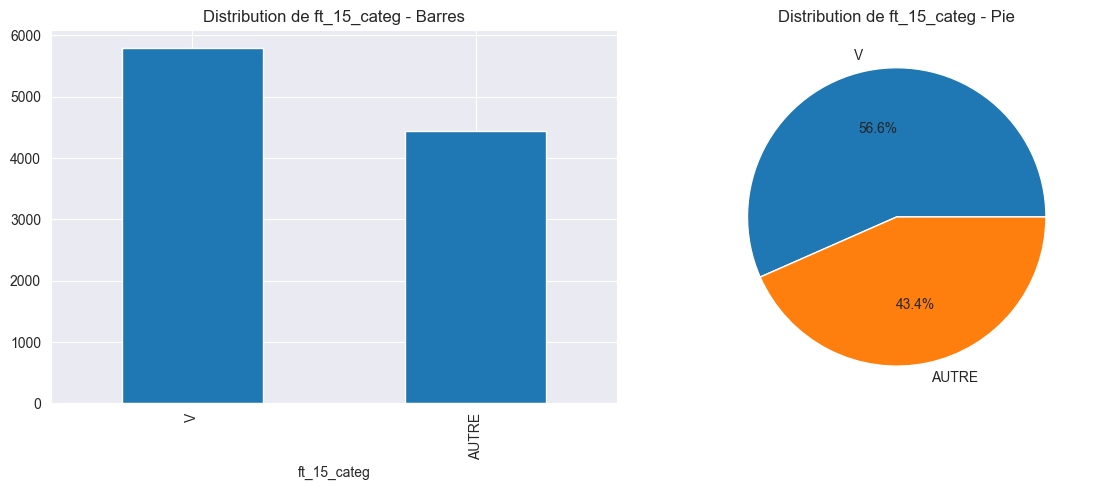

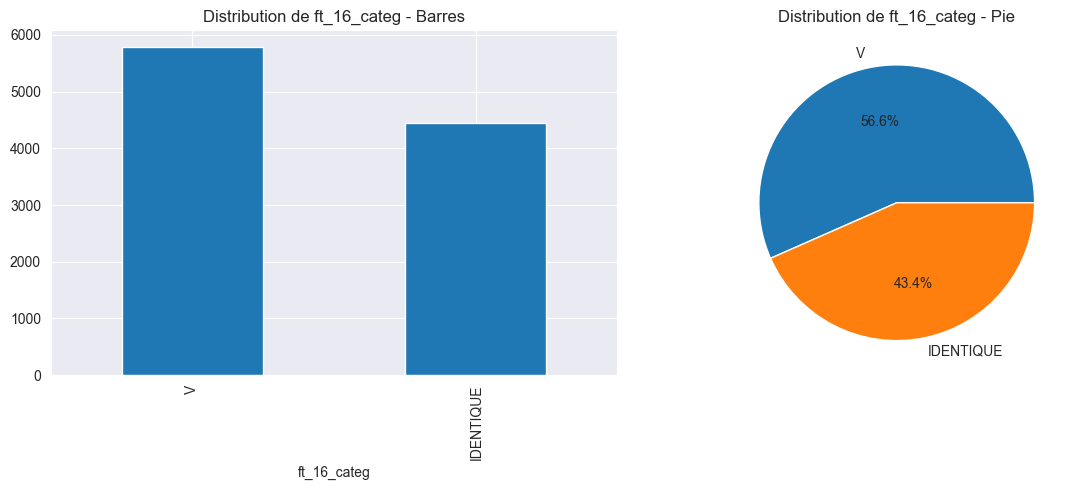

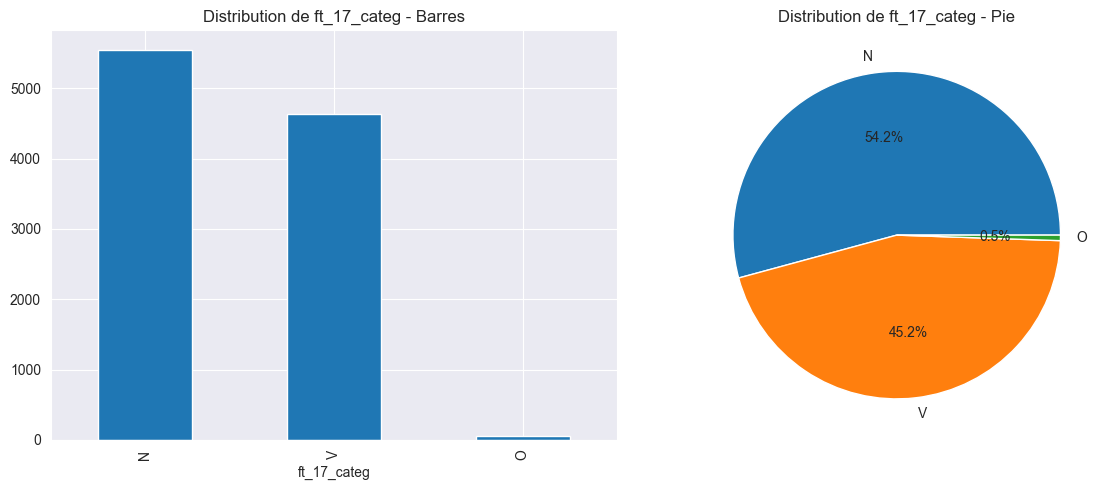

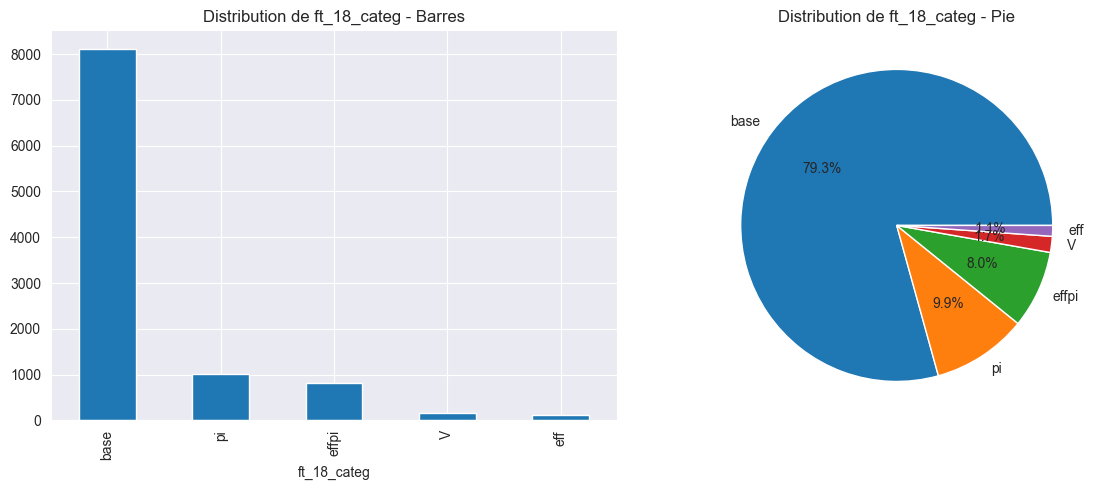

In [322]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes de type 'object', à l'exception de 'identifiant', 'EXPO', et 'Insee'
cols_to_plot = [col for col in dfZ.select_dtypes('object').columns]

# Boucle pour générer les graphiques pour chaque colonne sélectionnée
for col in cols_to_plot:
    # Créer une nouvelle figure pour chaque colonne
    plt.figure(figsize=(12, 5))  # Ajuster la taille de la figure selon le besoin
    
    # Premier subplot pour le graphique en barres
    plt.subplot(1, 2, 1)
    dfZ[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution de {col} - Barres')  # Ajouter un titre au graphique en barres
    
    # Second subplot pour le graphique en camembert
    plt.subplot(1, 2, 2)
    dfZ[col].value_counts().plot.pie(autopct='%1.1f%%')  # Ajouter des pourcentages pour clarifier le camembert
    plt.ylabel('')  # Supprimer le label de l'axe y pour le graphique en camembert
    plt.title(f'Distribution de {col} - Pie')  # Ajouter un titre au graphique en camembert
    
    plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils s'insèrent dans la figure
    plt.show()  # Afficher la figure


Observations : 
- ft_5_categ, ft_6_categ, ft_11_categ, ft_17_categ à trop peu de données pour la valeur 'O', donc on va remplacer ces valeurs là par null
- ft_8_categ, ft_10_categ à trop peu de données pour la valeur 'N', donc on va remplacer ces valeurs là par null
- ft_9_categ à trop peu de données pour les valeurs '2' et '3', donc on va remplacer ces valeurs là par null

### ft_5_categ, ft_6_categ, ft_11_categ, ft_17_categ remplacer la valeur 'O' par null

In [323]:
# Liste des colonnes où remplacer 'O' par NaN
cols_to_replace = ['ft_5_categ', 'ft_6_categ', 'ft_11_categ', 'ft_17_categ']

# Remplacer 'O' par NaN dans les colonnes spécifiées
for col in cols_to_replace:
    dfZ[col] = dfZ[col].replace('O', np.nan)

# Vérifier les modifications sur une des colonnes
print(dfZ['ft_5_categ'].head())


0    V
1    V
2    V
3    N
4    V
Name: ft_5_categ, dtype: object


### ft_8_categ, ft_10_categ remplacer la valeur 'N' par null

In [324]:
# Liste des colonnes où remplacer 'O' par NaN
cols_to_replace = ['ft_8_categ', 'ft_10_categ',]

# Remplacer 'N' par NaN dans les colonnes spécifiées
for col in cols_to_replace:
    dfZ[col] = dfZ[col].replace('N', np.nan)

# Vérifier les modifications sur une des colonnes
print(dfZ['ft_8_categ'].head())

0    O
1    V
2    V
3    V
4    O
Name: ft_8_categ, dtype: object


### ft_9_categ remplacer les valeurs '2' et '3' par null

In [325]:
# Remplacer '2' et '3' par NaN dans la colonne 'ft_9_categ'
values_to_replace = {'2': np.nan, '3': np.nan}
dfZ['ft_9_categ'] = dfZ['ft_9_categ'].replace(values_to_replace)

# Vérifier les modifications
print(dfZ['ft_9_categ'].head())


0    1
1    V
2    V
3    V
4    1
Name: ft_9_categ, dtype: object


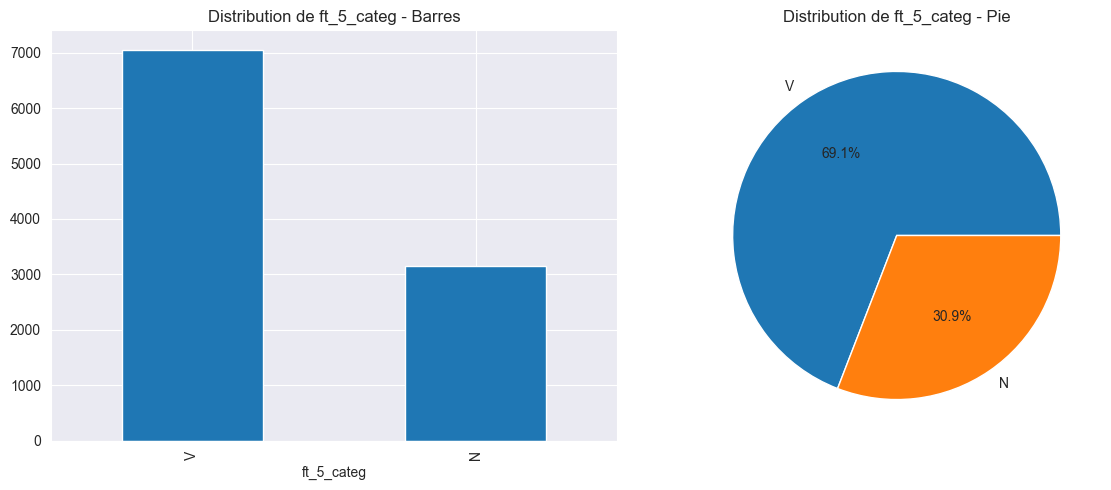

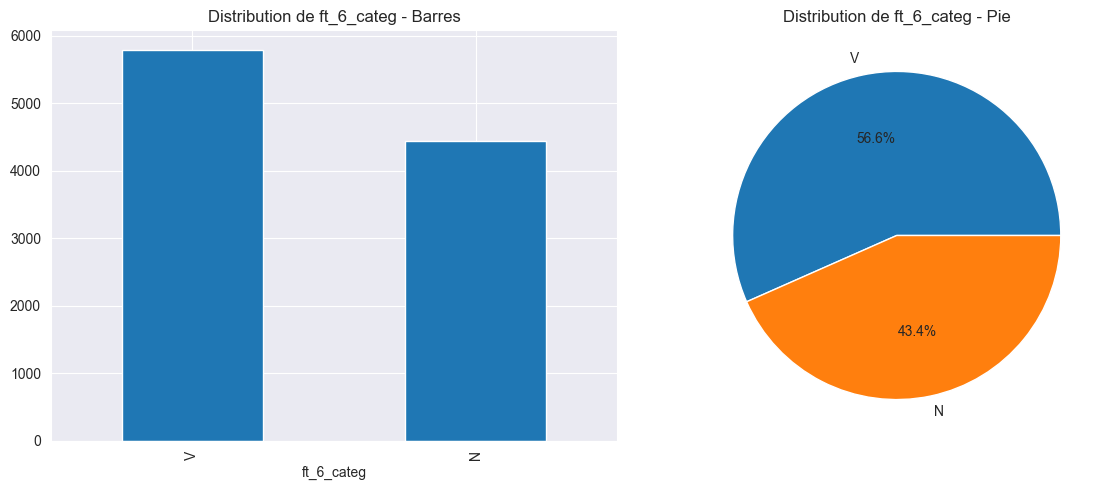

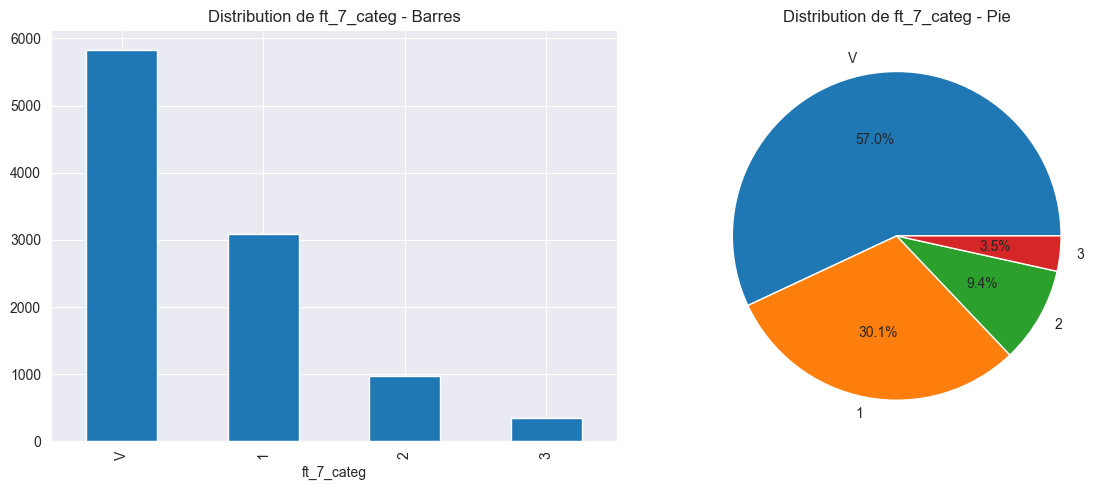

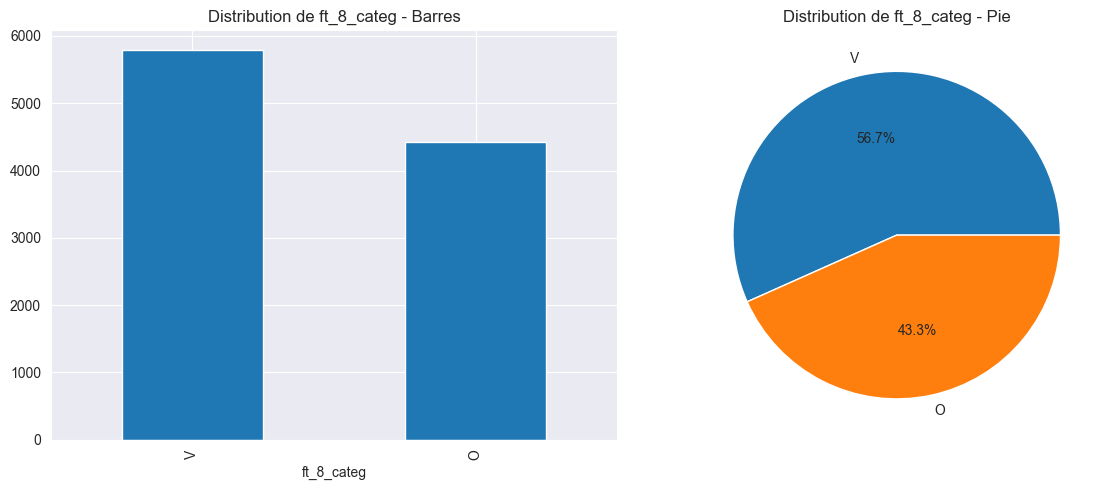

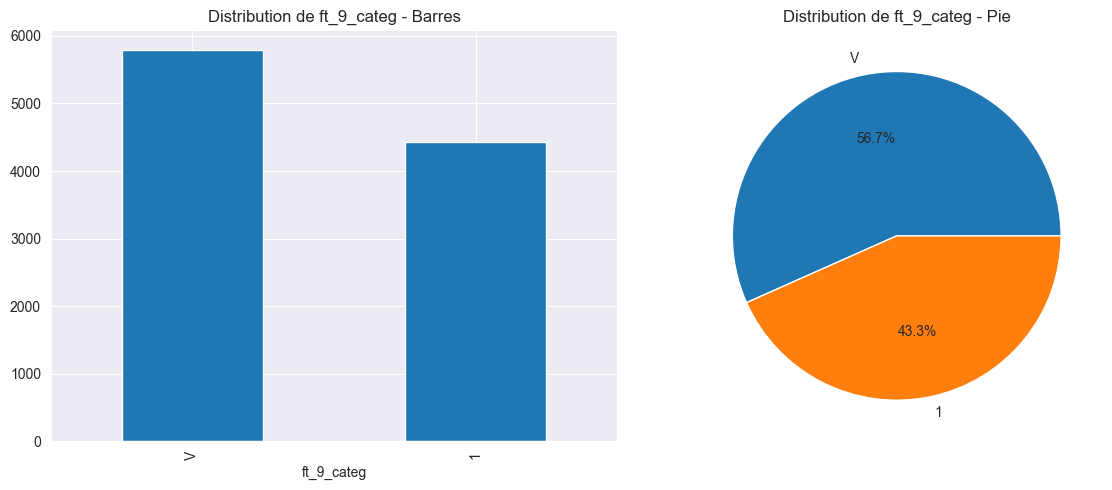

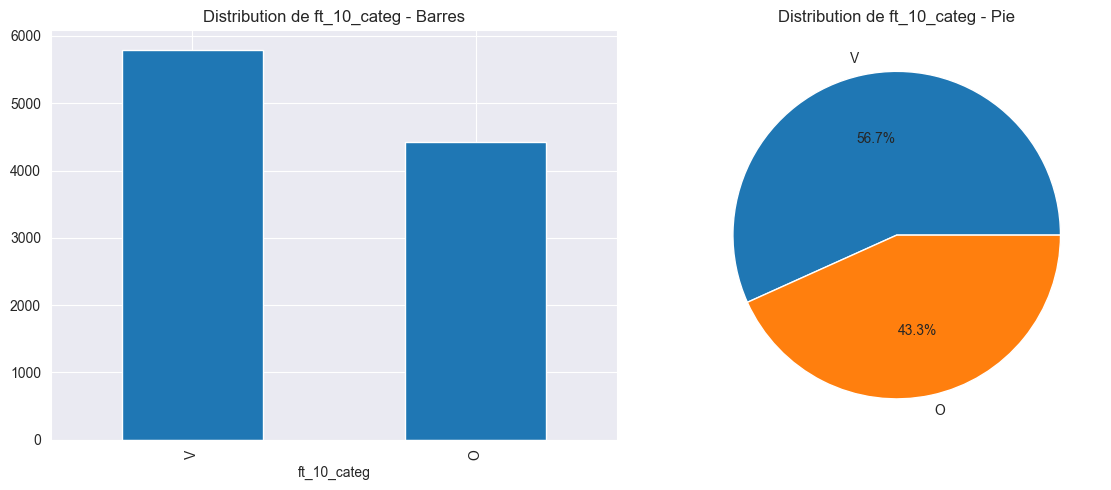

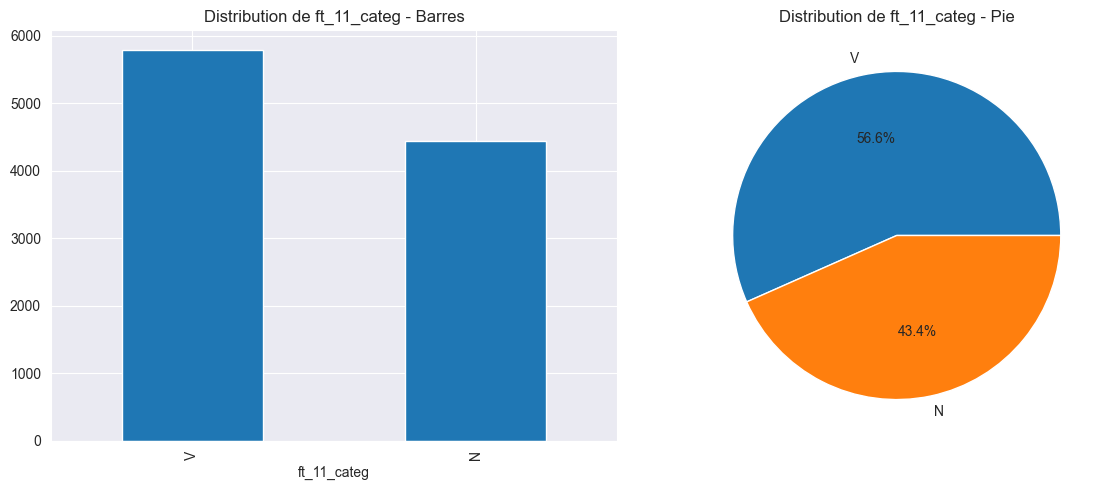

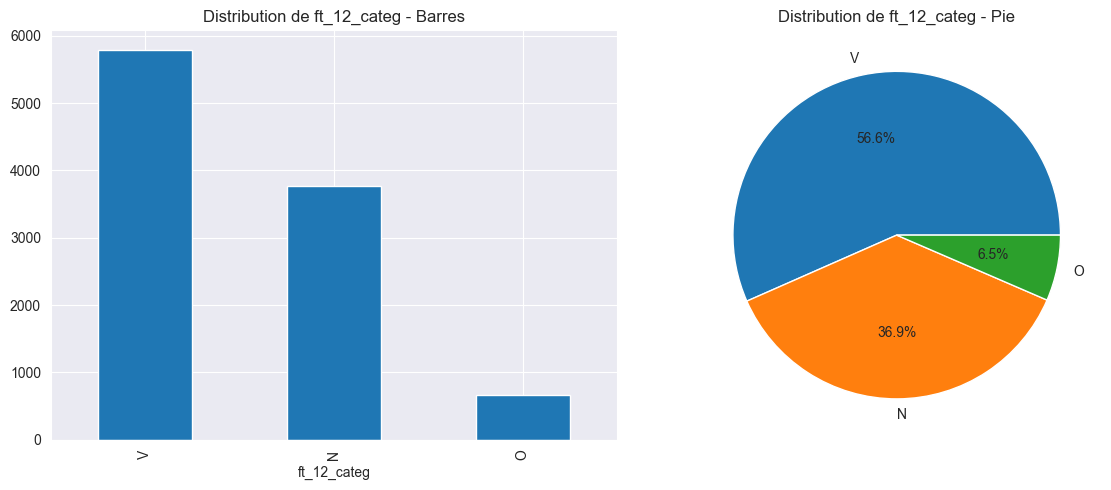

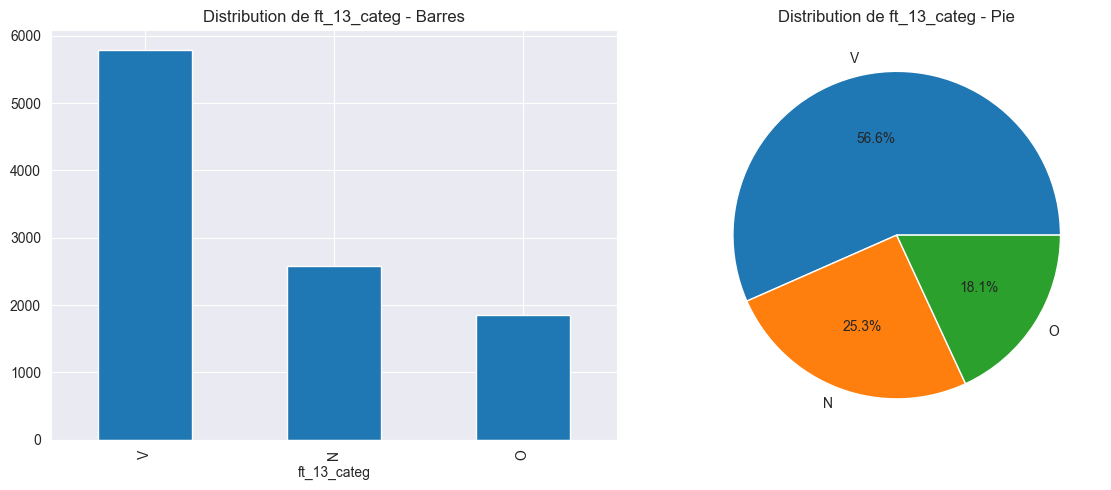

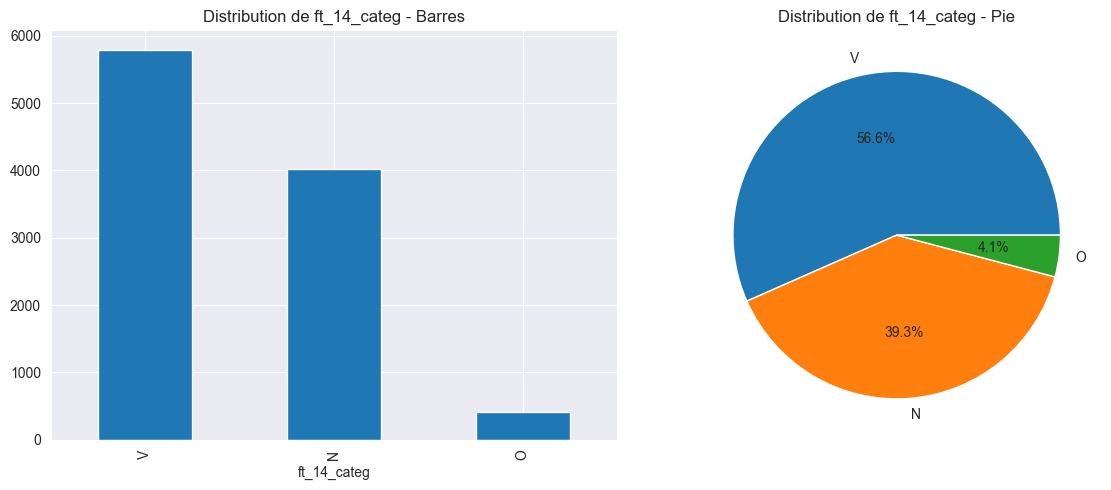

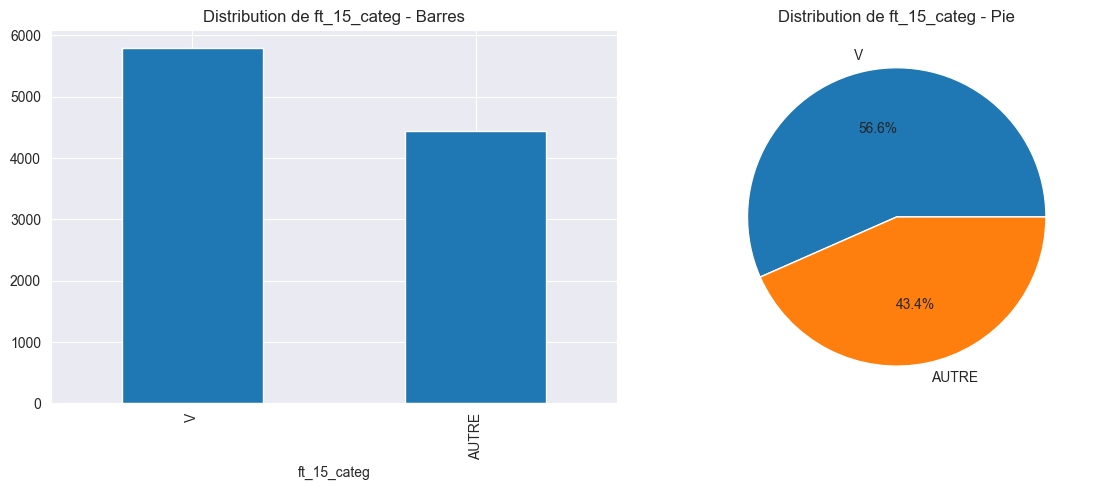

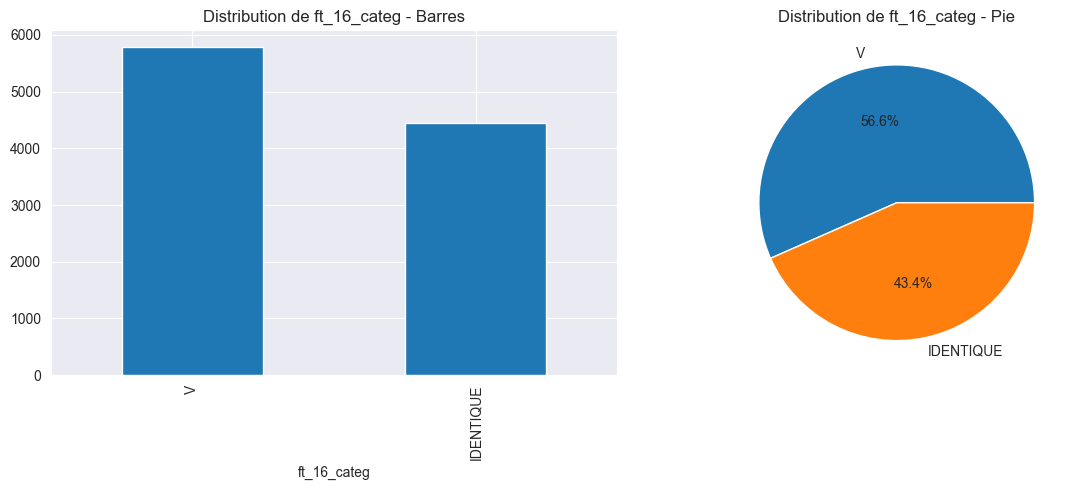

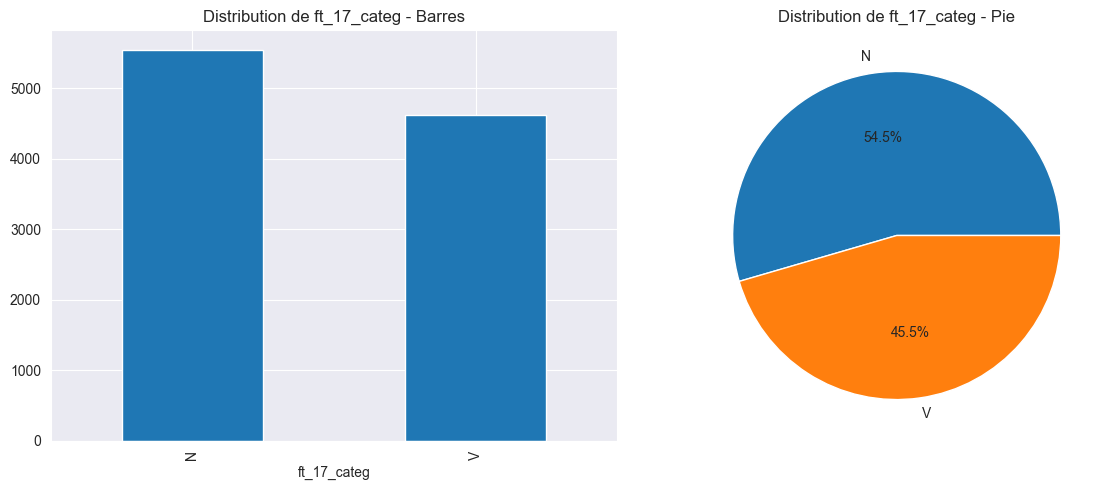

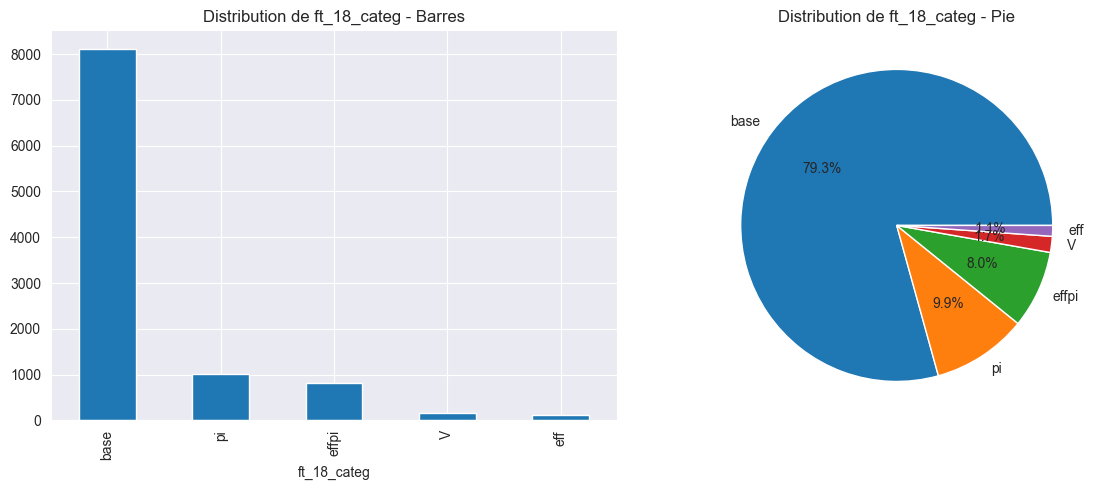

In [326]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes de type 'object', à l'exception de 'identifiant', 'EXPO', et 'Insee'
cols_to_plot = [col for col in dfZ.select_dtypes('object').columns ]

# Boucle pour générer les graphiques pour chaque colonne sélectionnée
for col in cols_to_plot:
    # Créer une nouvelle figure pour chaque colonne
    plt.figure(figsize=(12, 5))  # Ajuster la taille de la figure selon le besoin
    
    # Premier subplot pour le graphique en barres
    plt.subplot(1, 2, 1)
    dfZ[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution de {col} - Barres')  # Ajouter un titre au graphique en barres
    
    # Second subplot pour le graphique en camembert
    plt.subplot(1, 2, 2)
    dfZ[col].value_counts().plot.pie(autopct='%1.1f%%')  # Ajouter des pourcentages pour clarifier le camembert
    plt.ylabel('')  # Supprimer le label de l'axe y pour le graphique en camembert
    plt.title(f'Distribution de {col} - Pie')  # Ajouter un titre au graphique en camembert
    
    plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils s'insèrent dans la figure
    plt.show()  # Afficher la figure


# Analyse bivariée

### Variable numérique

In [327]:
positive_df = dfZ[dfZ['target'] == 1]
negative_df = dfZ[dfZ['target'] == 0]

In [328]:
positive_df['target'].value_counts()

target
1    2322
Name: count, dtype: int64

In [329]:
negative_df['target'].value_counts()

target
0    7907
Name: count, dtype: int64

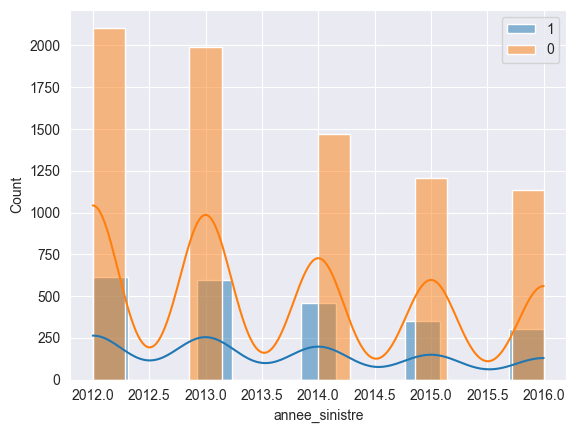

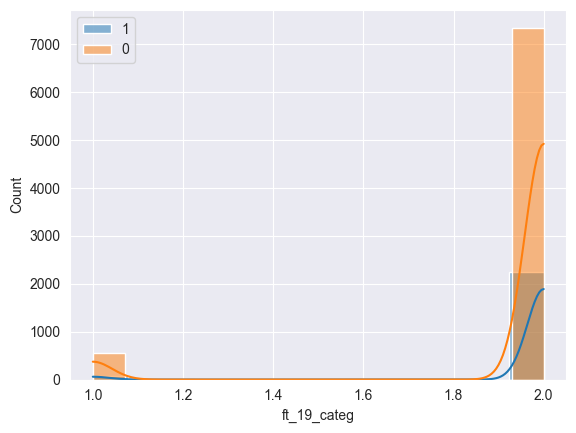

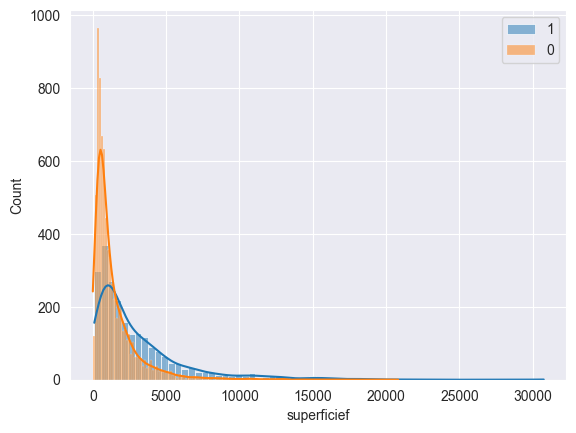

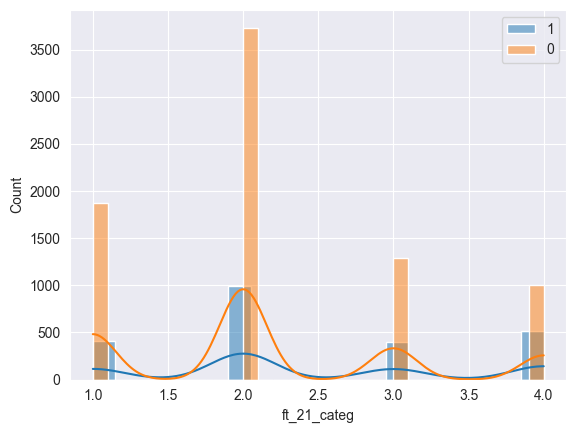

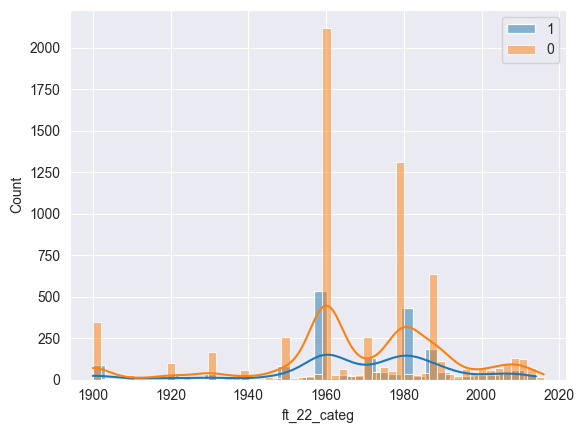

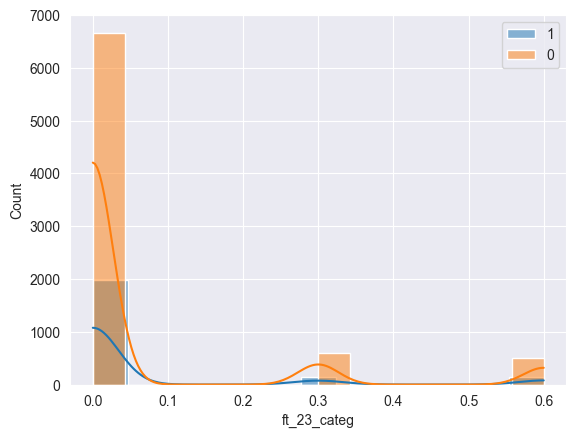

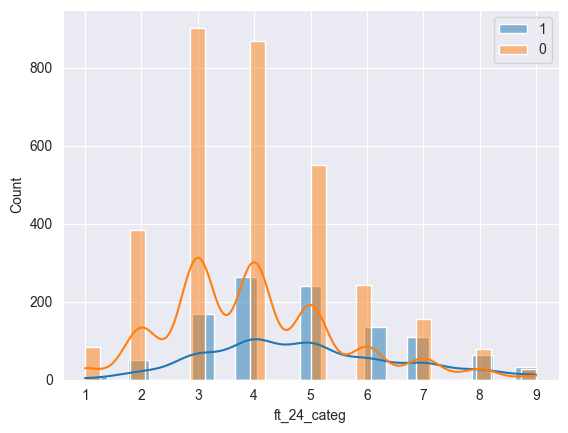

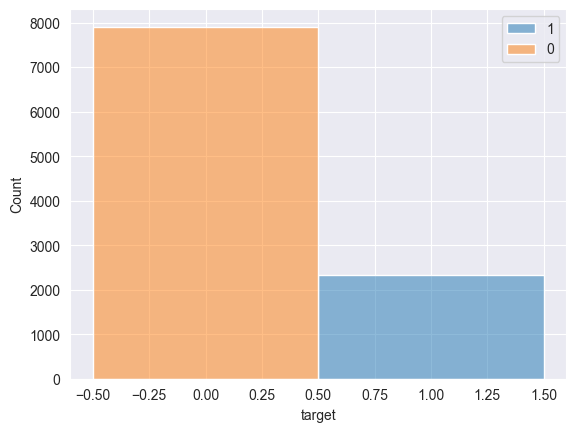

In [330]:
for col in positive_df.select_dtypes(['float64','int64']):

    sns.histplot(positive_df[col], label = '1', kde=True, edgecolor=None)
    sns.histplot(negative_df[col], label = '0', kde=True, edgecolor=None)
    
    plt.legend()
    plt.show()

Observations : 
- Sur année_sinistre, on remarque qu'en fonction des années, le nombre de sinitres reste proportionnel
- Sur ft_19_categ, on remarque qu'il y a plus de sinsitres pour la valeur 2.0
- Pour ce qui est des colonnes superficief, ft_21_categ, ft_22_categ, ft_24_categ, on remarque une certaine différence

### Analyse bivarié variable qualitative

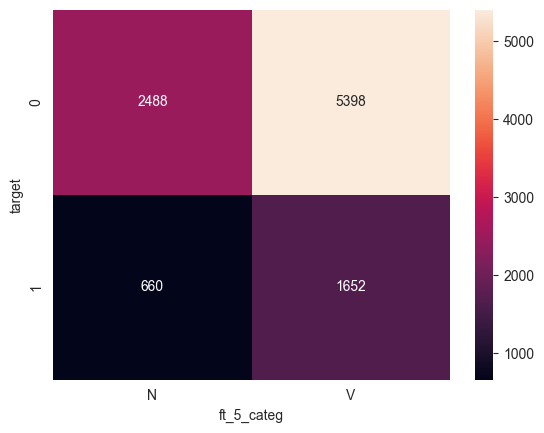

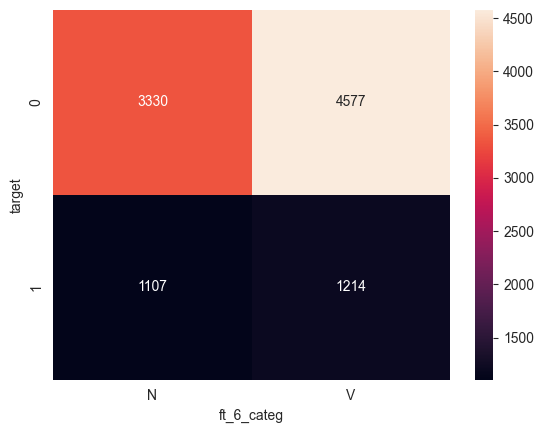

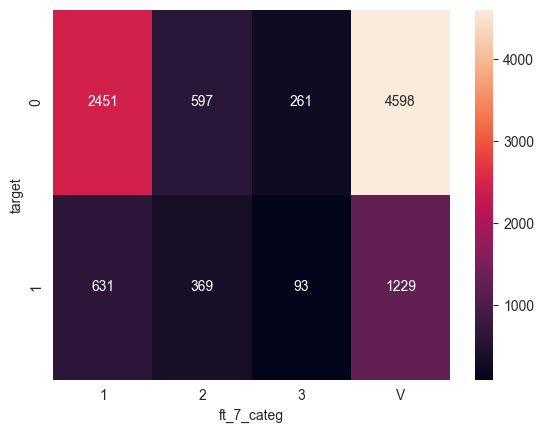

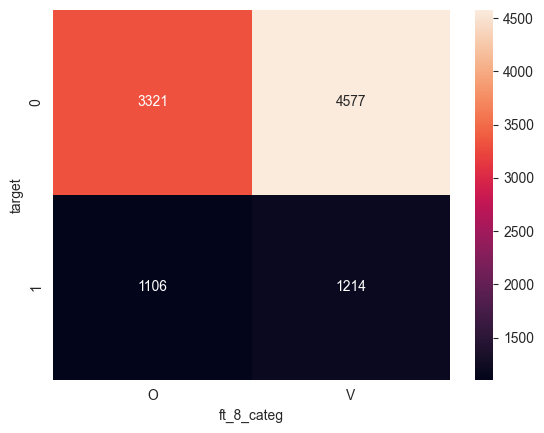

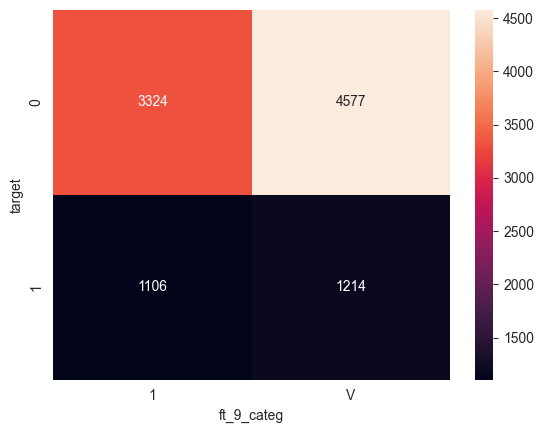

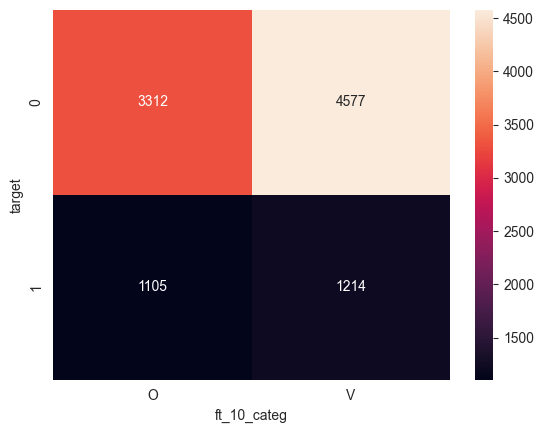

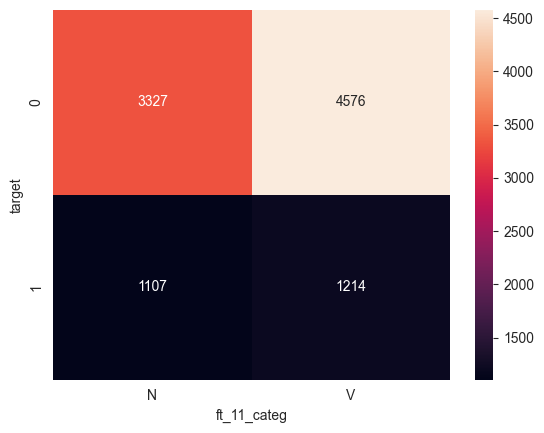

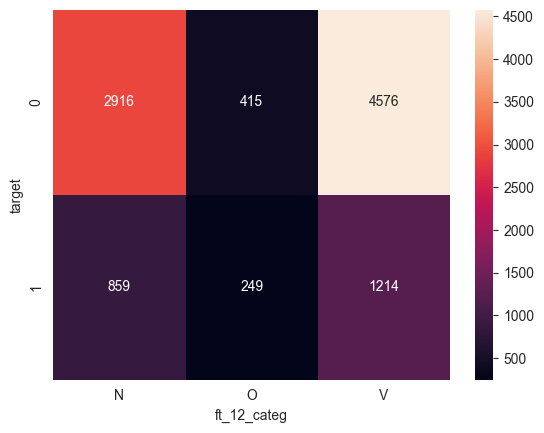

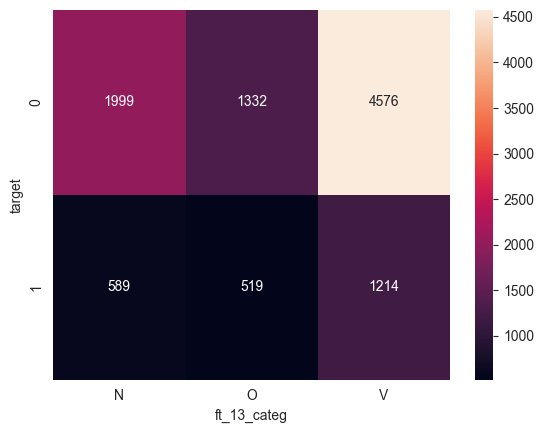

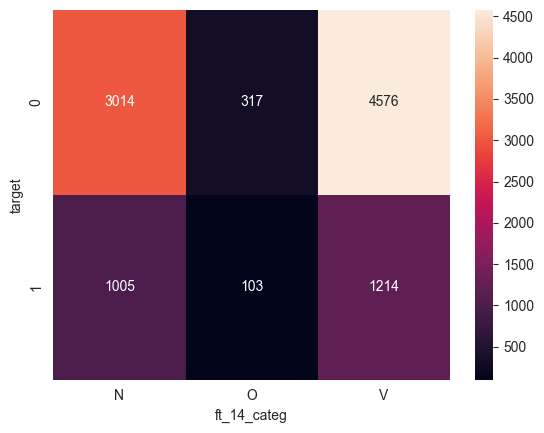

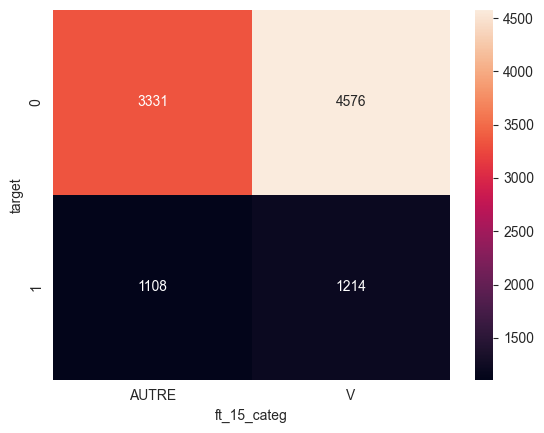

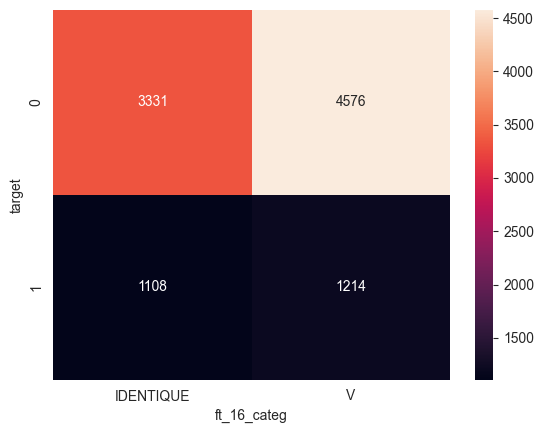

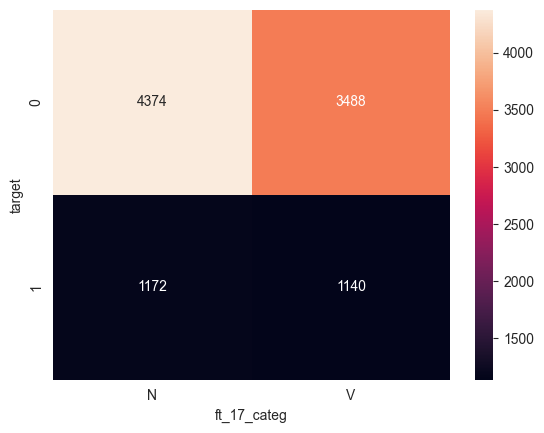

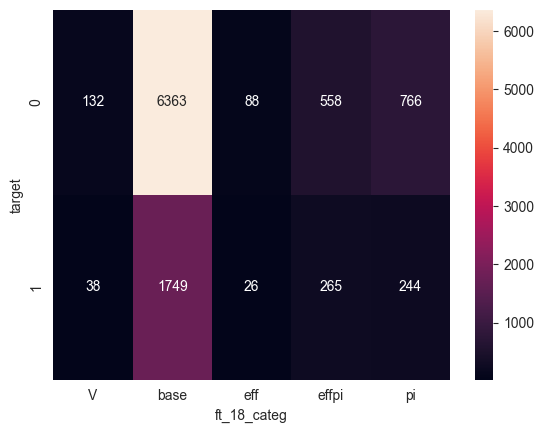

In [331]:
for col in dfZ.drop('target', axis=1).select_dtypes('object'):
    
    plt.figure()
    sns.heatmap(pd.crosstab(dfZ['target'], dfZ[col]), annot=True, fmt='d')

Observations : 
- Peu de valeurs et ne semble donc pas significatif : ft_7_categ_3, ft_12_categ_O, ft_14_categ_O, ft_18_categ_V, ft_18_categ_eff
- Beaucoup de valeurs mais ne semble pas significatif : ft_7_categ_2
- Semble être les plus significatif : Il n'y a pas de données qui semblent être plus signicative, les ratios entre les valeurs sont tous plus ou moins équivalents

# Preprocessing

### Train - test split

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
trainset, testset = train_test_split(dfZ, test_size=0.2, random_state=0)

In [377]:
trainset['target'].value_counts()

target
0    6282
1    1901
Name: count, dtype: int64

In [378]:
testset['target'].value_counts()

target
0    1625
1     421
Name: count, dtype: int64

### Encodage

In [379]:
dfZ_encoded = pd.get_dummies(dfZ, columns=list(dfZ.drop('target',axis=1).select_dtypes('object').columns), dtype=int)

In [380]:
dfZ_encoded.head()

,annee_sinistre,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,target,ft_5_categ_N,...,ft_15_categ_V,ft_16_categ_IDENTIQUE,ft_16_categ_V,ft_17_categ_N,ft_17_categ_V,ft_18_categ_V,ft_18_categ_base,ft_18_categ_eff,ft_18_categ_effpi,ft_18_categ_pi
0,2014,False,2,1351.0,4,2012.0,0.0,2.0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2014,False,2,1972.0,2,1980.0,0.0,NaN,1,0,...,1,0,1,1,0,0,1,0,0,0
2,2013,True,2,1630.0,4,NaN,0.0,NaN,0,0,...,1,0,1,1,0,0,1,0,0,0
3,2013,False,2,532.0,3,NaN,0.0,NaN,0,1,...,1,0,1,1,0,0,1,0,0,0
4,2015,False,2,1050.0,2,1972.0,0.0,4.0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [381]:
dfZ_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   annee_sinistre         10229 non-null  int64  
 1   ft_4_categ             10229 non-null  bool   
 2   ft_19_categ            10229 non-null  int64  
 3   superficief            10110 non-null  float64
 4   ft_21_categ            10229 non-null  int64  
 5   ft_22_categ            8781 non-null   float64
 6   ft_23_categ            10045 non-null  float64
 7   ft_24_categ            4360 non-null   float64
 8   target                 10229 non-null  int64  
 9   ft_5_categ_N           10229 non-null  int64  
 10  ft_5_categ_V           10229 non-null  int64  
 11  ft_6_categ_N           10229 non-null  int64  
 12  ft_6_categ_V           10229 non-null  int64  
 13  ft_7_categ_1           10229 non-null  int64  
 14  ft_7_categ_2           10229 non-null  int64  
 15  ft

### Création d'une fonction de preprocessing à appliquer sur notre trainset et testset


In [382]:
def preprocessing(dfZ):
    
    #encodage
    dfZ = pd.get_dummies(dfZ, columns=list(dfZ.drop('target',axis=1).select_dtypes('object').columns), dtype=int)
    dfZ['target'] = dfZ['target'].astype('int')
    
    #gestion des valeurs manquantes
    dfZ = dfZ.dropna()
    
    #division variables explicatives et variable cible    
    X = dfZ.drop('target', axis=1)
    y = dfZ['target']
    
    return X, y

In [383]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [384]:
X_train.head()

,annee_sinistre,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,ft_5_categ_N,ft_5_categ_V,...,ft_15_categ_V,ft_16_categ_IDENTIQUE,ft_16_categ_V,ft_17_categ_N,ft_17_categ_V,ft_18_categ_V,ft_18_categ_base,ft_18_categ_eff,ft_18_categ_effpi,ft_18_categ_pi
8290,2015,False,2,2300.0,3,2006.0,0.3,6.0,0,1,...,0,1,0,0,1,0,1,0,0,0
4318,2013,False,2,350.0,2,1970.0,0.0,3.0,0,1,...,0,1,0,0,1,0,1,0,0,0
7437,2015,False,2,850.0,4,1920.0,0.0,4.0,0,1,...,0,1,0,0,1,0,0,0,1,0
8688,2014,False,2,5127.0,1,1968.0,0.0,7.0,0,1,...,0,1,0,0,1,0,1,0,0,0
9513,2013,False,2,858.0,2,1995.0,0.3,2.0,0,1,...,0,1,0,0,1,1,0,0,0,0


## Construction du premier modèle

In [385]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [386]:
len(y_pred)

832

## Evaluation du premier modèle

In [387]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[495 161]
 [105  71]]


### Classification report

In [388]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       656
           1       0.31      0.40      0.35       176

    accuracy                           0.68       832
   macro avg       0.57      0.58      0.57       832
weighted avg       0.72      0.68      0.70       832


### Learning curve

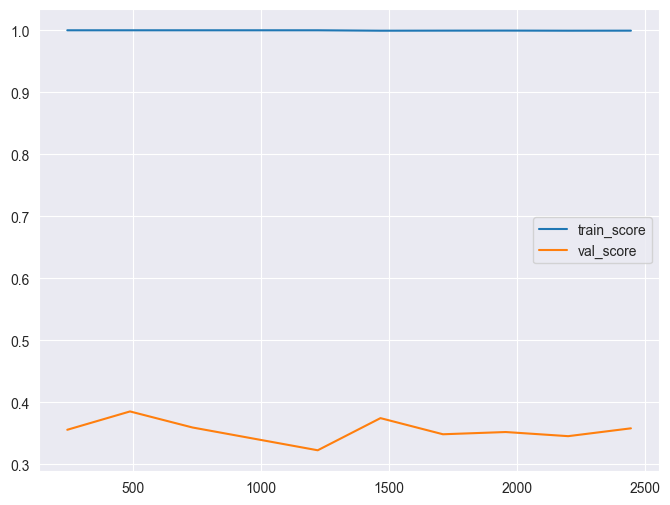

In [389]:
from sklearn.model_selection import learning_curve

N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))

plt.plot(N,train_score.mean(axis=1), label = 'train_score')
plt.plot(N,val_score.mean(axis=1), label = 'val_score')
plt.legend()

### Correlation des variables

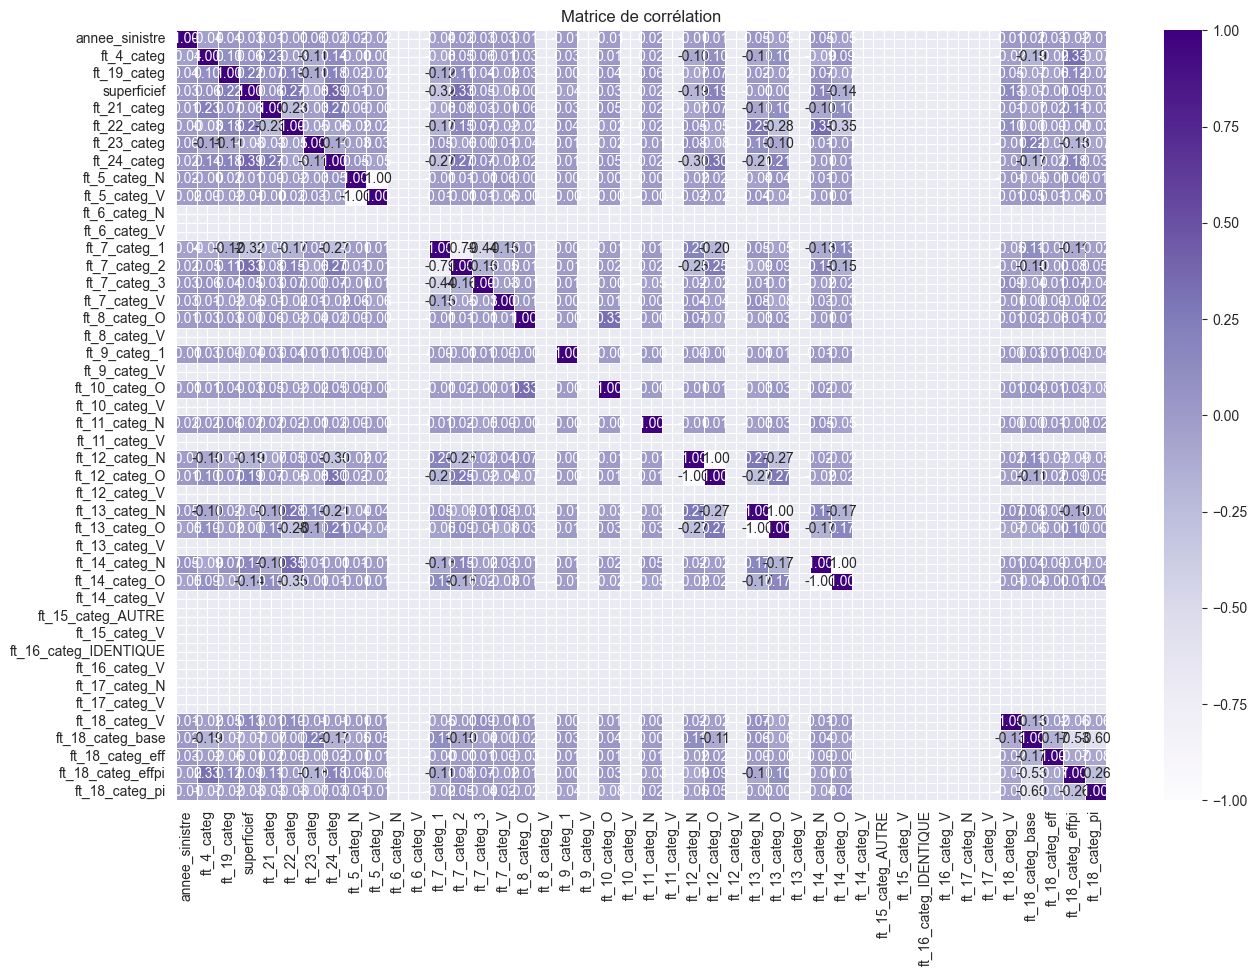

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que X_train est déjà défini et est votre ensemble de données d'entraînement

# Calcul de la matrice de corrélation
corr_mat = X_train.corr()

# Création de la figure et des axes pour le plot
fig, ax = plt.subplots(figsize=(15, 10))

# Création de la heatmap de la matrice de corrélation
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.2f', cmap='Purples')

# Optionnel: Ajouter un titre
ax.set_title('Matrice de corrélation')

# Afficher la heatmap
plt.show()


### On supprime ft_5_categ_N, ft_7_categ_1, ft_12_categ_N, ft_13_categ_N, ft_14_categ_N


## Variance des variables

In [391]:
X_train.var(axis=0)


annee_sinistre           1.962069e+00
ft_4_categ               2.142449e-01
ft_19_categ              1.170124e-01
superficief              5.949949e+06
ft_21_categ              8.969889e-01
ft_22_categ              1.103348e+03
ft_23_categ              4.977796e-02
ft_24_categ              2.737615e+00
ft_5_categ_N             2.143286e-03
ft_5_categ_V             2.143286e-03
ft_6_categ_N             0.000000e+00
ft_6_categ_V             0.000000e+00
ft_7_categ_1             2.143610e-01
ft_7_categ_2             1.711018e-01
ft_7_categ_3             7.496033e-02
ft_7_categ_V             1.032384e-02
ft_8_categ_O             2.448717e-03
ft_8_categ_V             0.000000e+00
ft_9_categ_1             1.837667e-03
ft_9_categ_V             0.000000e+00
ft_10_categ_O            3.059014e-03
ft_10_categ_V            0.000000e+00
ft_11_categ_N            1.225864e-03
ft_11_categ_V            0.000000e+00
ft_12_categ_N            1.232057e-01
ft_12_categ_O            1.232057e-01
ft_12_categ_

### On supprime ft_6_categ_N, ft_6_categ_V,ft_7_categ_3, ft_7_categ_V, ft_8_categ_V,ft_8_categ_O, ft_9_categ_V,ft_9_categ_1, ft_10_categ_V, ft_10_categ_O, ft_11_categ_V, ft_11_categ_N ft_12_categ_V, ft_13_categ_V, ft_14_categ_N, ft_14_categ_O, ft_14_categ_V, ft_15_categ_AUTRE, ft_15_categ_V, ft_16_categ_IDENTIQUE, ft_16_categ_V, ft_17_categ_N, ft_17_categ_V, ft_18_categ_V, ft_18_categ_eff, ft_23_categ

## Fonction d'apprentissage et d'évaluation


In [392]:
from sklearn.preprocessing import StandardScaler

def preprocessing(dfZ):
    
    #encodage
    dfZ = pd.get_dummies(dfZ, columns=list(dfZ.drop('target',axis=1).select_dtypes('object').columns), dtype=int)
    dfZ['target'] = dfZ['target'].astype('int')
    
    #feature selection
    dfZ = dfZ.drop(['ft_5_categ_N', 'ft_7_categ_1', 'ft_12_categ_N', 'ft_13_categ_N', 'ft_14_categ_N', 'ft_6_categ_N', 'ft_6_categ_V','ft_7_categ_3', 'ft_7_categ_V', 'ft_8_categ_V','ft_8_categ_O', 'ft_9_categ_V','ft_9_categ_1', 'ft_10_categ_V', 'ft_10_categ_O', 'ft_11_categ_V', 'ft_11_categ_N', 'ft_12_categ_V', 'ft_13_categ_V', 'ft_14_categ_N', 'ft_14_categ_O', 'ft_14_categ_V', 'ft_15_categ_AUTRE', 'ft_15_categ_V','ft_16_categ_IDENTIQUE', 'ft_16_categ_V', 'ft_17_categ_N', 'ft_17_categ_V', 'ft_18_categ_V', 'ft_18_categ_eff', 'ft_23_categ' ], axis=1)

    
    #gestion des valeurs manquantes
    dfZ = dfZ.dropna()
    dfZ = dfZ.fillna(dfZ.mean())
    
    #division variables explicatives et variable cible    
    X = dfZ.drop('target', axis=1)
    y = dfZ['target']
    
    #Standardisation
    X = StandardScaler().fit_transform(X)
    
    return X, y

In [393]:
def evaluation(model, X_train, y_train, X_test, y_test):
    #entrainement
    model.fit(X_train, y_train)

    #prediction
    y_prod = model.predict(X_test)

    #evaluation
    print(confusion_matrix(y_test, y_prod))
    
    print(classification_report(y_test, y_prod))
    
    #learning
    N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(8,6))

    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()

[[617  44]
 [132  50]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       661
           1       0.53      0.27      0.36       182

    accuracy                           0.79       843
   macro avg       0.68      0.60      0.62       843
weighted avg       0.76      0.79      0.76       843


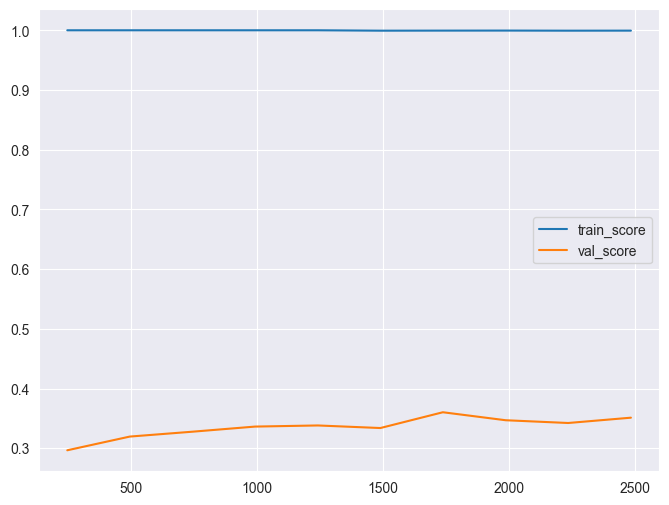

In [395]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model, X_train, y_train, X_test, y_test)

Observations : 
On remarque ici qu'on à une meilleure précision car notre accuracy est ici de 0.79 comparé à 0.68

In [397]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [374]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).plot.bar(color='purple')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'